In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("presentation")
from scipy.signal import find_peaks
from scipy import integrate
from scipy.optimize import curve_fit
from tqdm import tqdm
from scipy.interpolate import interp1d
basedir = "/home/joey/Documents/quest_b1021/CK1/"

# J to kbT (T=300K)
conv = 2.479 #1kT = 2.479 kJ/mol (kT*N_A)
22/conv #4000kJ/1mol to ~22kJ/180mol
#total molecules
molecules=180

def derivative(x,y):
    dx = x[1]-x[0]
    i=0
    dydx=np.gradient(y,dx)
    return dydx


In [2]:
# EXAMPLE FOR order.xvg
text_rows=17
columns=["atom","Sxx","Syy","Szz"]
charge=["0","10","20","50","70","80","100"]
for c in charge:
    file = "C12/charge_variation/"+c+"/order.xvg"
    df1=pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns)
    #df1.to_csv(file.replace(".xvg",".csv"))

In [3]:
# EXAMPLE FOR dens*.xvg
text_rows=24
group = "ions"
columns = ["z","density"]
charge=["0","10","20","50","70","80","100"]
for c in charge:
    file = "C12/charge_variation/"+c+"/dens_"+group+".xvg"
    df1=pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns)
    #df1.to_csv(file.replace(".xvg",".csv"))

FileNotFoundError: [Errno 2] File b'/home/joey/Documents/quest_b1021/CK1/C12/charge_variation/0/dens_ions.xvg' does not exist: b'/home/joey/Documents/quest_b1021/CK1/C12/charge_variation/0/dens_ions.xvg'

In [4]:
# EXAMPLE FOR rdf*.xvg
text_rows=25
columns = ["r","g(r)"]
charge=["0","10","20","50","70","80","100"]
for c in charge:
    file = "C14/charge_variation/"+c+"/rdf_chiral_carbon.xvg"
    df1=pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns)
    #df1.to_csv(file.replace(".xvg",".csv"))

In [5]:
# EXAMPLE FOR LJ_sr_pp.xvg
text_rows=24
columns = ["time","energy(kJ/mol)"]
charge=["0","10","20","50","70","80","100"]
for c in charge:
    file = "C14/charge_variation/"+c+"/LJ_sr_pp.xvg"
    df1=pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns)
    #df1.to_csv(file.replace(".xvg",".csv"))

In [6]:
# EXAMPLE FOR coul_sr_pp.xvg
text_rows=24
columns = ["time","energy(kJ/mol)"]
charge=["0","10","20","50","70","80","100"]
for c in charge:
    file = "C14/charge_variation/"+c+"/coul_sr_pp.xvg"
    df1=pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns)
    #df1.to_csv(file.replace(".xvg",".csv"))

0 -360.7627598387407
10 389.8141148083203
20 -49.982479430158335
30 -89.69267790578081
40 531.9163984291256
50 -15.423772595837157
60 119.61202592366186
70 -92.1739973986122
80 -72.05602983696632
90 182.17994129638498
100 79.39819254517838


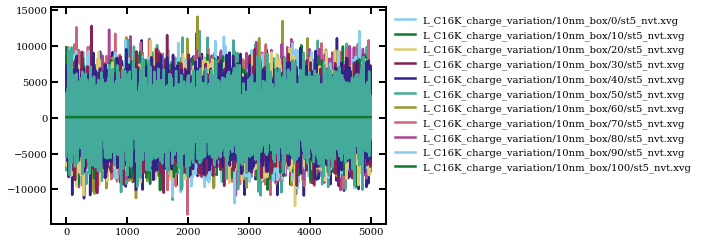

In [7]:
def line(x,a):
    return a

# EXAMPLE FOR order.xvg
text_rows=24
columns=["time","st","3","4"]
charge=["0","10","20","30","40","50","60","70","80","90","100"]
plt.figure()
for c in charge:
    file = "L_C16K_charge_variation/10nm_box/"+c+"/st5_nvt.xvg"
    df1=pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns)
    #df1.to_csv(file.replace(".xvg",".csv"))
    plt.plot(df1[df1.columns[0]],df1[df1.columns[1]])#,label=file)
    popt,pcov=curve_fit(line,df1[df1.columns[0]],df1[df1.columns[1]])
    plt.plot(df1[df1.columns[0]],[line(x,*popt) for x in df1[df1.columns[0]]],label=file)
    print(c,popt[0])
    #plt.legend()
    
plt.legend(bbox_to_anchor =(1, 1))

In [3]:
df1

time           st            3            4
0        1.0 -5429.078125 -1076.564209  2794.992432
1        2.0  2633.749512  1489.869263  1827.426758
2        3.0  1122.340210  -520.636292  2135.614014
3        4.0  3293.868408  2478.101562  2704.981445
4        5.0 -4158.111328 -1417.239502  1565.594849
...      ...          ...          ...          ...
4995  4996.0 -2834.180664  -291.609192  3024.854248
4996  4997.0  3142.958252   249.532547  2408.678711
4997  4998.0  1265.248291  -331.395111  2055.409424
4998  4999.0 -1364.969238 -2046.791992  5047.559570
4999  5000.0 -2801.528320  -205.975311  2621.486084

[5000 rows x 4 columns]

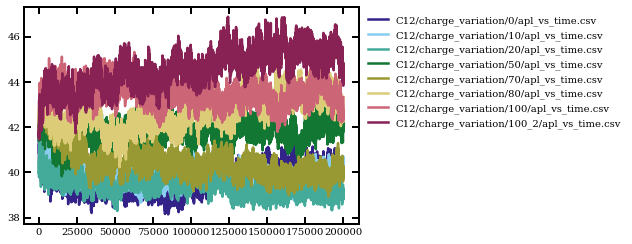

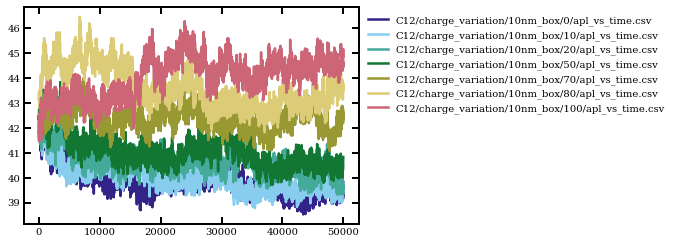

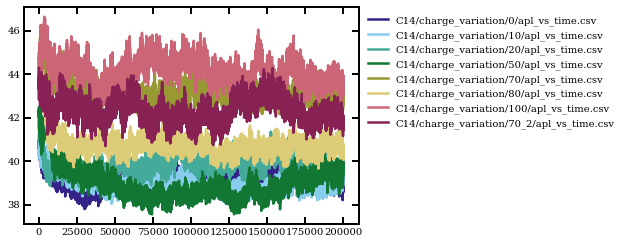

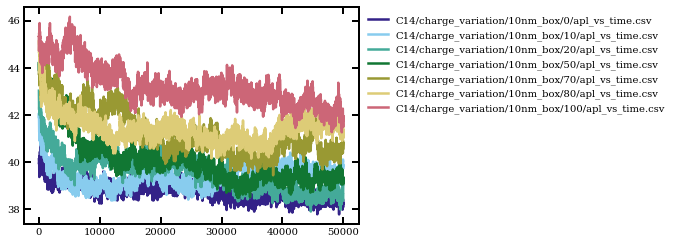

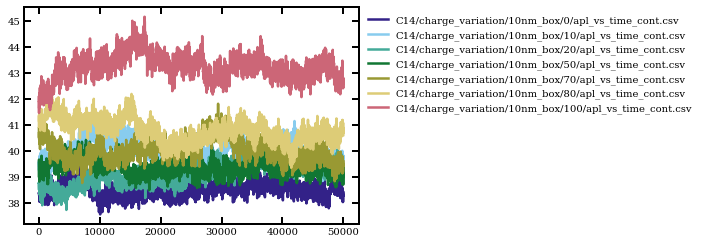

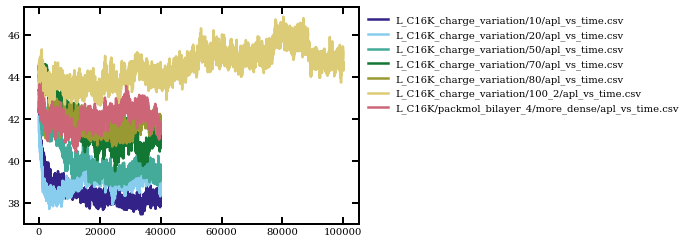

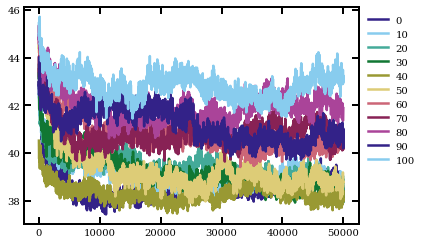

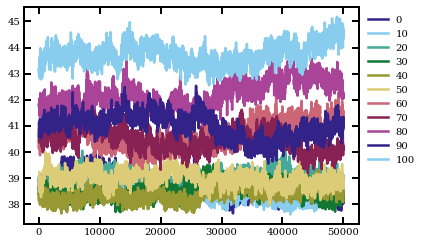

In [2]:
# Plotting C12 apl vs time
columns = ["time","apl"]
charge=["0","10","20","50","70","80","100","100_2"]
dfs = []
file_names=[]
for c in charge:
    file = "C12/charge_variation/"+c+"/apl_vs_time.csv"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,header=1,names=columns))
    
res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
for file in file_names:
    df = res[file]
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
plt.legend(bbox_to_anchor =(1, 1))

# Plotting C12 10nm_box apl vs time
columns = ["time","apl"]
charge=["0","10","20","50","70","80","100"]
dfs_apl_12 = []
file_names=[]
for c in charge:
    file = "C12/charge_variation/10nm_box/"+c+"/apl_vs_time.csv"
    file_names.append(file)
    dfs_apl_12.append(pd.read_csv(basedir+file,header=1,names=columns))
    
res = {file_names[i]: dfs_apl_12[i] for i in range(len(dfs_apl_12))}
plt.figure()
for file in file_names:
    df = res[file]
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
plt.legend(bbox_to_anchor =(1, 1))

# Plotting C14
columns = ["time","apl"]
charge=["0","10","20","50","70","80","100","70_2"]
dfs = []
file_names=[]
for c in charge:
    file = "C14/charge_variation/"+c+"/apl_vs_time.csv"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,header=1,names=columns))
    
res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
for file in file_names:
    df = res[file]
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
plt.legend(bbox_to_anchor =(1, 1))

# Plotting C14 10nm box
columns = ["time","apl"]
charge=["0","10","20","50","70","80","100"]
dfs_apl_14 = []
file_names=[]
for c in charge:
    file = "C14/charge_variation/10nm_box/"+c+"/apl_vs_time.csv"
    file_names.append(file)
    dfs_apl_14.append(pd.read_csv(basedir+file,header=1,names=columns))
    
res = {file_names[i]: dfs_apl_14[i] for i in range(len(dfs_apl_14))}
plt.figure()
for file in file_names:
    df = res[file]
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
plt.legend(bbox_to_anchor =(1, 1))

# Plotting C14 10nm box cont
columns = ["time","apl"]
charge=["0","10","20","50","70","80","100"]
dfs_apl_14 = []
file_names=[]
for c in charge:
    file = "C14/charge_variation/10nm_box/"+c+"/apl_vs_time_cont.csv"
    file_names.append(file)
    dfs_apl_14.append(pd.read_csv(basedir+file,header=1,names=columns))
    
res = {file_names[i]: dfs_apl_14[i] for i in range(len(dfs_apl_14))}
plt.figure()
for file in file_names:
    df = res[file]
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
plt.legend(bbox_to_anchor =(1, 1))


# Plotting C16
columns = ["time","apl"]
charge=["10","20","50","70","80","100_2"]
dfs = []
file_names=[]
for c in charge:
    file = "L_C16K_charge_variation/"+c+"/apl_vs_time.csv"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,header=1,names=columns))
file = "L_C16K/packmol_bilayer_4/more_dense/apl_vs_time.csv"
file_names.append(file)
dfs.append(pd.read_csv(basedir+file,header=1,names=columns))
    
res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
for file in file_names:
    df = res[file]
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
plt.legend(bbox_to_anchor =(1, 1))

# Plotting C16 lys rdf 10nm_box
columns = ["time","apl"]
charge=["0","10","20","30","40","50","60","70","80","90","100"]
dfs_apl_16 = []
file_names=[]
labels = []
for c in charge:
    file = "L_C16K_charge_variation/10nm_box/"+c+"/apl_vs_time.csv"
    file_names.append(file)
    labels.append(c)
    dfs_apl_16.append(pd.read_csv(basedir+file,header=1,names=columns))
    
res = {file_names[i]: dfs_apl_16[i] for i in range(len(dfs_apl_16))}
plt.figure()
for file in file_names:
    df = res[file]
    #plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=labels[file_names.index(file)])
plt.legend(bbox_to_anchor =(1, 1))

# Plotting C16 lys rdf 10nm_box, second 50 ns
columns = ["time","apl"]
charge=["0","10","20","30","40","50","60","70","80","90","100"]
dfs_apl = []
file_names=[]
labels = []
for c in charge:
    file = "L_C16K_charge_variation/10nm_box/"+c+"/apl_vs_time_cont.csv"
    file_names.append(file)
    labels.append(c)
    dfs_apl.append(pd.read_csv(basedir+file,header=1,names=columns))
    
res = {file_names[i]: dfs_apl[i] for i in range(len(dfs_apl))}
plt.figure()
for file in file_names:
    df = res[file]
    #plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=labels[file_names.index(file)])
plt.legend(bbox_to_anchor =(1, 1))

Text(0.5, 1.0, 'C$_{16}$K$_{1}$')

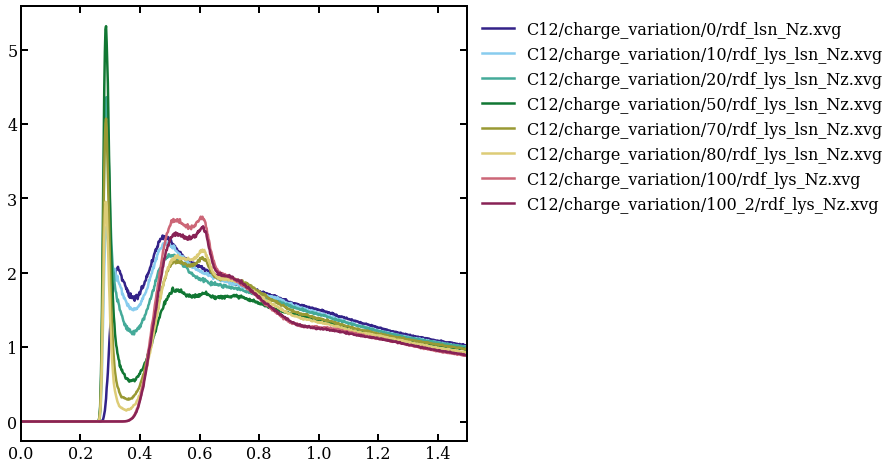

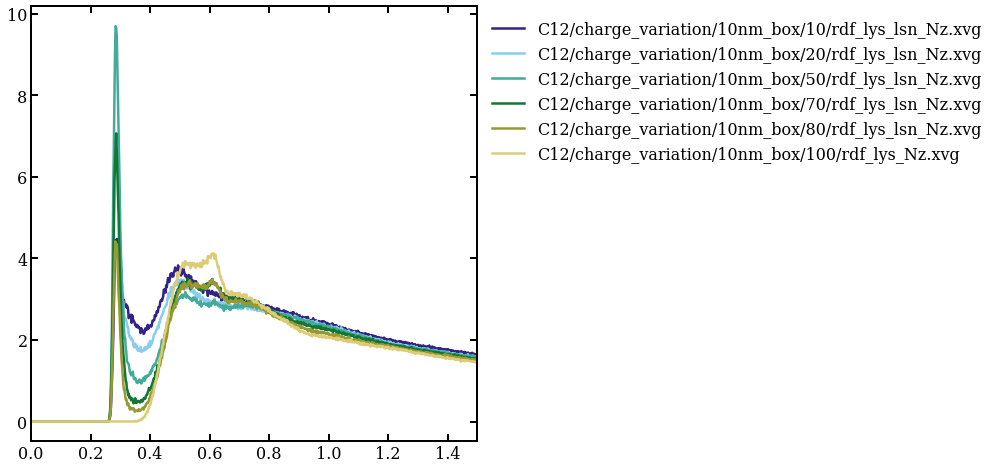

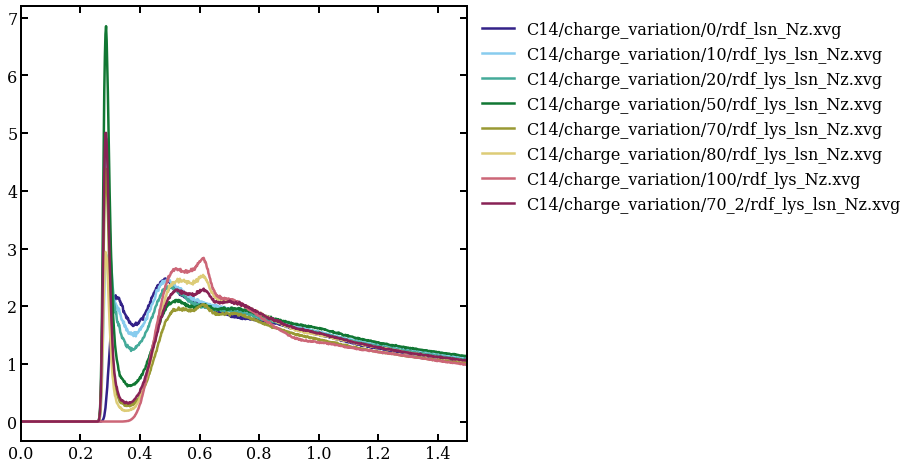

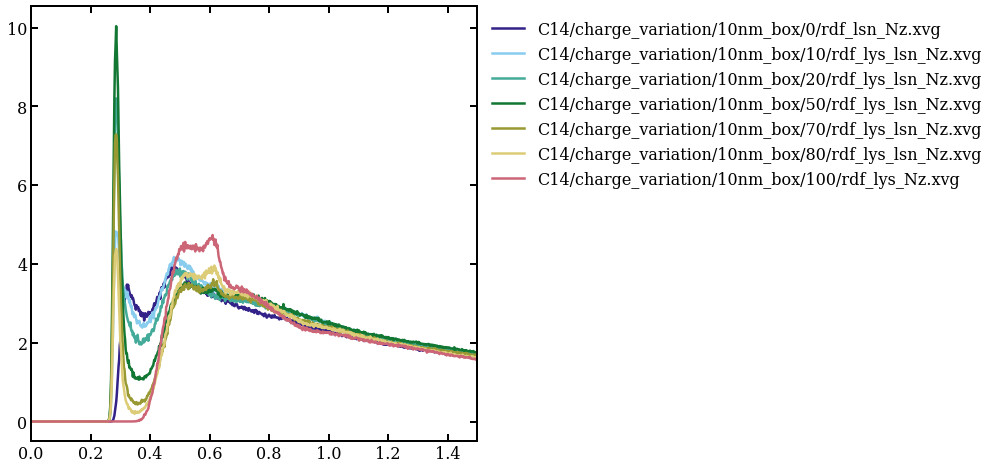

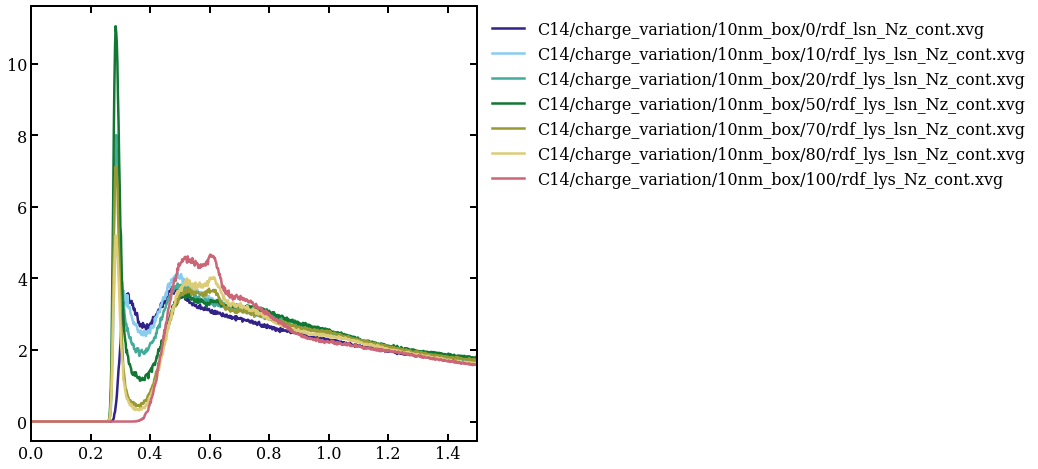

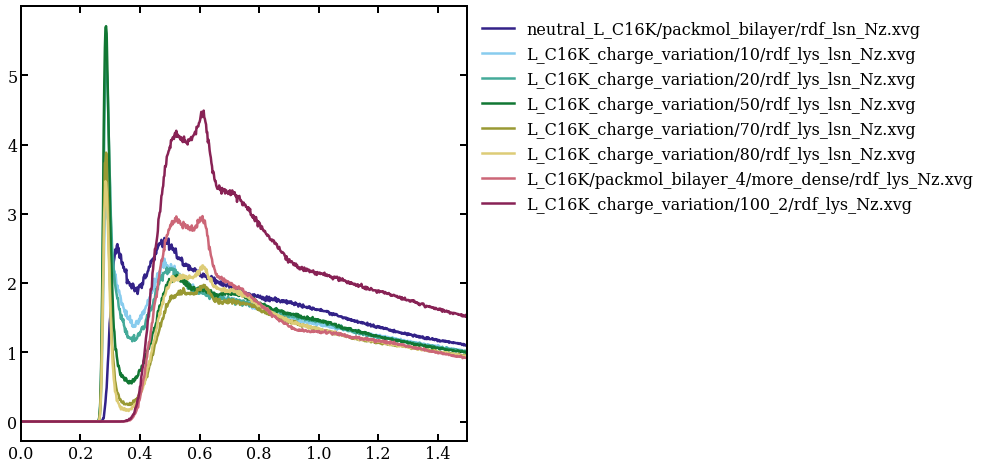

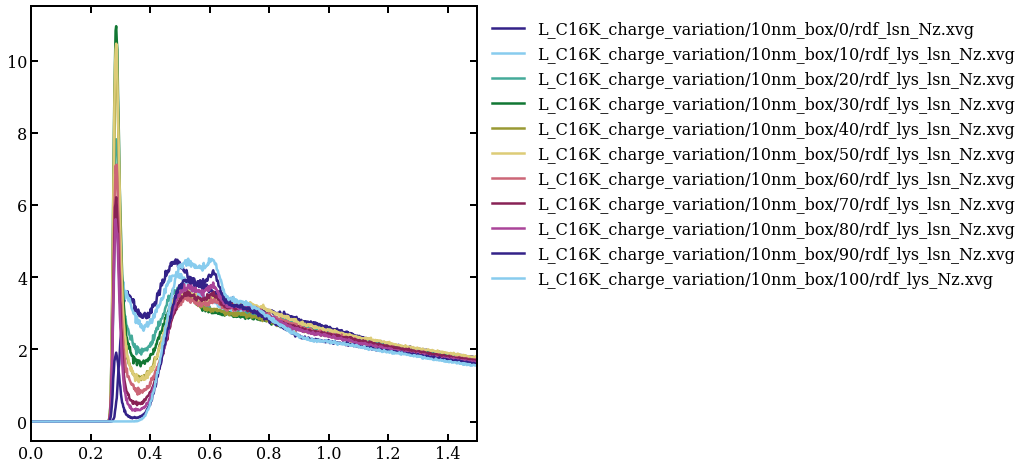

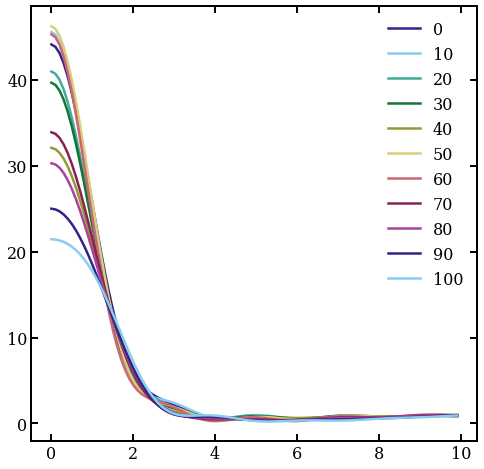

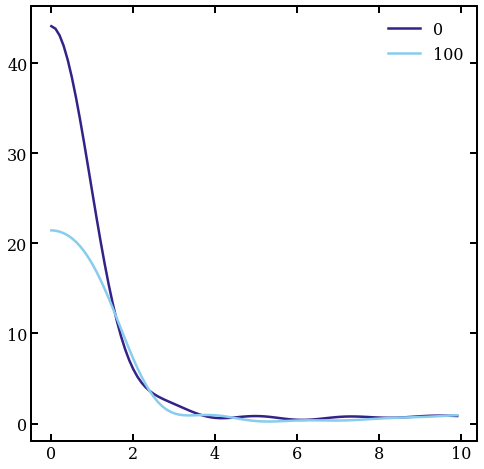

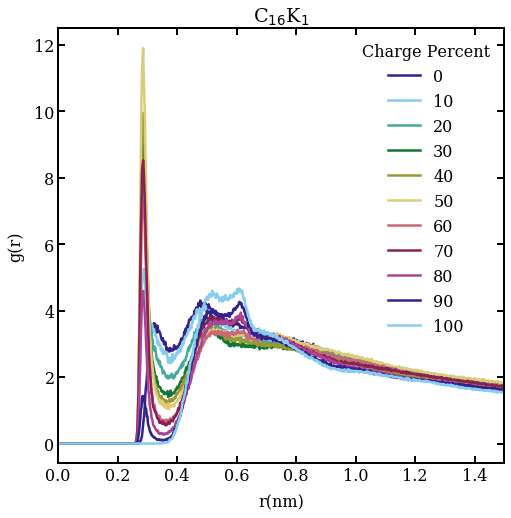

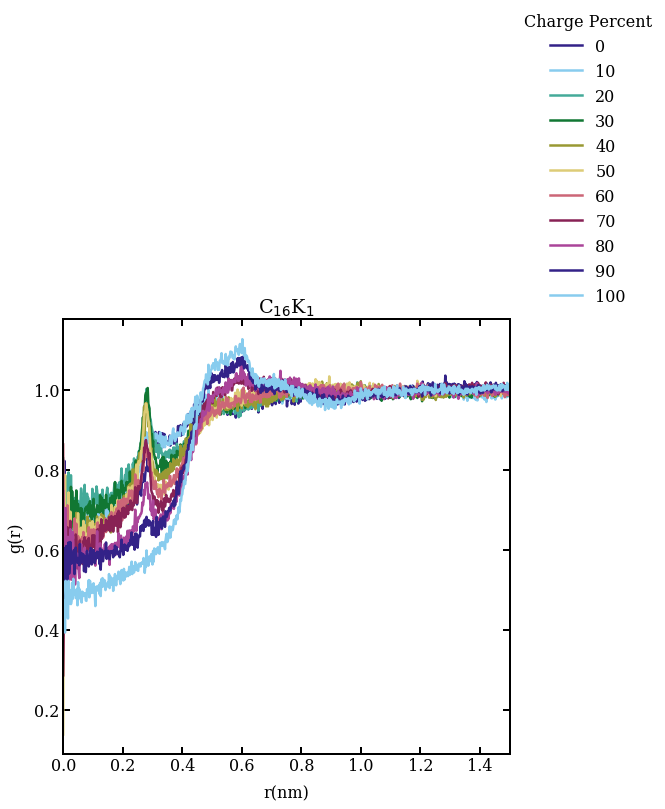

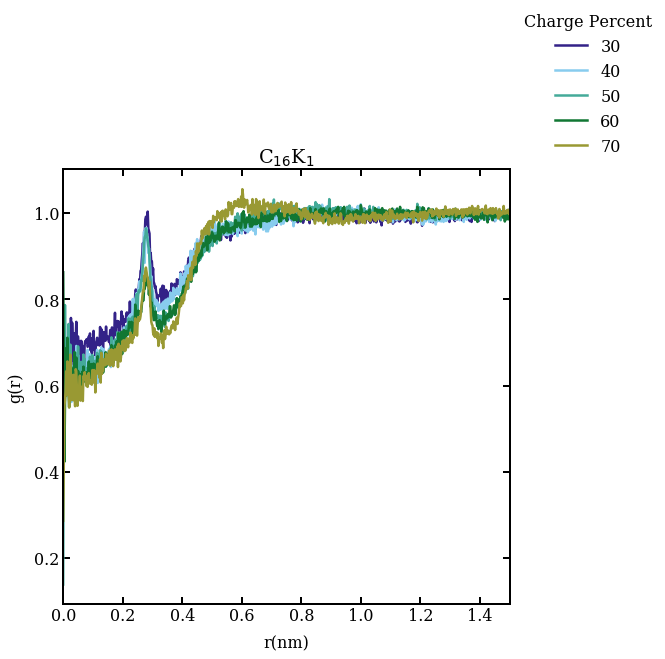

In [16]:
# Plotting C12 lys rdf
text_rows=25
columns = ["r","g(r)"]
charge=["0","10","20","50","70","80","100","100_2"]
dfs = []
file_names=[]
for c in charge:
    if c=="100" or c=="100_2":
        file = "C12/charge_variation/"+c+"/rdf_lys_Nz.xvg"
        file_names.append(file)
        dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    elif c=="0":
        file = "C12/charge_variation/"+c+"/rdf_lsn_Nz.xvg"
        file_names.append(file)
        dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    else:
        file = "C12/charge_variation/"+c+"/rdf_lys_lsn_Nz.xvg"
        file_names.append(file)
        dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
plt.xlim([0,1.5])
for file in file_names:
    df = res[file]
    peak_index=find_peaks(df['g(r)'],height=400)[0]
    for index in peak_index:
        plt.scatter(df['r'][index],df['g(r)'][index],color="#AA4499")
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
plt.legend(bbox_to_anchor =(1, 1))

# Plotting C12 lys rdf
text_rows=25
columns = ["r","g(r)"]
charge=["10","20","50","70","80","100"]
dfs = []
file_names=[]
for c in charge:
    if c=="100" or c=="100_2":
        file = "C12/charge_variation/10nm_box/"+c+"/rdf_lys_Nz.xvg"
        file_names.append(file)
        dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    elif c=="0":
        file = "C12/charge_variation/10nm_box/"+c+"/rdf_lsn_Nz.xvg"
        file_names.append(file)
        dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    else:
        file = "C12/charge_variation/10nm_box/"+c+"/rdf_lys_lsn_Nz.xvg"
        file_names.append(file)
        dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
plt.xlim([0,1.5])
for file in file_names:
    df = res[file]
    peak_index=find_peaks(df['g(r)'],height=400)[0]
    for index in peak_index:
        plt.scatter(df['r'][index],df['g(r)'][index],color="#AA4499")
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
plt.legend(bbox_to_anchor =(1, 1))


# Plotting C14 lys rdf
text_rows=25
columns = ["r","g(r)"]
charge=["0","10","20","50","70","80","100","70_2"]
dfs = []
file_names=[]
for c in charge:
    if c=="100":
        file = "C14/charge_variation/"+c+"/rdf_lys_Nz.xvg"
        file_names.append(file)
        dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    elif c=="0":
        file = "C14/charge_variation/"+c+"/rdf_lsn_Nz.xvg"
        file_names.append(file)
        dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    else:
        file = "C14/charge_variation/"+c+"/rdf_lys_lsn_Nz.xvg"
        file_names.append(file)
        dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
plt.xlim([0,1.5])
for file in file_names:
    df = res[file]
    peak_index=find_peaks(df['g(r)'],height=400)[0]
    for index in peak_index:
        plt.scatter(df['r'][index],df['g(r)'][index],color="#AA4499")
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
plt.legend(bbox_to_anchor =(1, 1))


# Plotting C14 lys rdf
text_rows=25
columns = ["r","g(r)"]
charge=["0","10","20","50","70","80","100"]
dfs = []
file_names=[]
for c in charge:
    if c=="100":
        file = "C14/charge_variation/10nm_box/"+c+"/rdf_lys_Nz.xvg"
        file_names.append(file)
        dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    elif c=="0":
        file = "C14/charge_variation/10nm_box/"+c+"/rdf_lsn_Nz.xvg"
        file_names.append(file)
        dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    else:
        file = "C14/charge_variation/10nm_box/"+c+"/rdf_lys_lsn_Nz.xvg"
        file_names.append(file)
        dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
plt.xlim([0,1.5])
for file in file_names:
    df = res[file]
    peak_index=find_peaks(df['g(r)'],height=400)[0]
    for index in peak_index:
        plt.scatter(df['r'][index],df['g(r)'][index],color="#AA4499")
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
plt.legend(bbox_to_anchor =(1, 1))

# Plotting C14 lys rdf 10nm box cont
text_rows=25
columns = ["r","g(r)"]
charge=["0","10","20","50","70","80","100"]
dfs = []
file_names=[]
for c in charge:
    if c=="100":
        file = "C14/charge_variation/10nm_box/"+c+"/rdf_lys_Nz_cont.xvg"
        file_names.append(file)
        dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    elif c=="0":
        file = "C14/charge_variation/10nm_box/"+c+"/rdf_lsn_Nz_cont.xvg"
        file_names.append(file)
        dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    else:
        file = "C14/charge_variation/10nm_box/"+c+"/rdf_lys_lsn_Nz_cont.xvg"
        file_names.append(file)
        dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
plt.xlim([0,1.5])
for file in file_names:
    df = res[file]
    peak_index=find_peaks(df['g(r)'],height=400)[0]
    for index in peak_index:
        plt.scatter(df['r'][index],df['g(r)'][index],color="#AA4499")
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
plt.legend(bbox_to_anchor =(1, 1))



# Plotting C16 lys rdf
text_rows=25
columns = ["r","g(r)"]
charge=["0","10","20","50","70","80","100","100_2"]
dfs = []
file_names=[]
for c in charge:
    if c=="100":
        file = "L_C16K/packmol_bilayer_4/more_dense/rdf_lys_Nz.xvg"
        file_names.append(file)
        dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    elif c=="100_2":
        file = "L_C16K_charge_variation/100_2/rdf_lys_Nz.xvg"
        file_names.append(file)
        dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    elif c=="0":
        file = "neutral_L_C16K/packmol_bilayer/rdf_lsn_Nz.xvg"
        file_names.append(file)
        dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    else:
        file = "L_C16K_charge_variation/"+c+"/rdf_lys_lsn_Nz.xvg"
        file_names.append(file)
        dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
plt.xlim([0,1.5])
for file in file_names:
    df = res[file]
    peak_index=find_peaks(df['g(r)'],height=400)[0]
    for index in peak_index:
        plt.scatter(df['r'][index],df['g(r)'][index],color="#AA4499")
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
plt.legend(bbox_to_anchor =(1, 1))

# Plotting C16 lys rdf 10nm box
text_rows=25
columns = ["r","g(r)"]
charge=["0","10","20","30","40","50","60","70","80","90","100"]
dfs = []
file_names=[]
for c in charge:
    if c=="100":
        file = "L_C16K_charge_variation/10nm_box/"+c+"/rdf_lys_Nz.xvg"
        file_names.append(file)
        dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    elif c=="0":
        file = "L_C16K_charge_variation/10nm_box/"+c+"/rdf_lsn_Nz.xvg"
        file_names.append(file)
        dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    else:
        file = "L_C16K_charge_variation/10nm_box/"+c+"/rdf_lys_lsn_Nz.xvg"
        file_names.append(file)
        dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
plt.xlim([0,1.5])
for file in file_names:
    df = res[file]
    peak_index=find_peaks(df['g(r)'],height=400)[0]
    for index in peak_index:
        plt.scatter(df['r'][index],df['g(r)'][index],color="#AA4499")
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
plt.legend(bbox_to_anchor =(1, 1))

#structure factor calculations
s_list=[]
for j in range(0,len(dfs)):
    q_values=np.arange(0.01,10,0.1)
    structure_factor=[]
    rho=1
    r_values=dfs[j]['r'].values
    for q in q_values:
        r_int = []
        for i in range(0, len(r_values)):
            r_int.append(r_values[i]*np.sin(q*r_values[i])*(dfs[j]["g(r)"][i]-1))
        temp = integrate.trapz(r_int,r_values)
        temp*=4*np.pi*rho/q
        temp+=1
        structure_factor.append(temp)
    s_list.append(structure_factor)
plt.figure()
label=0
for s in s_list:
    plt.plot(q_values,s,label=label)
    label+=10
plt.legend(bbox_to_anchor =(1, 1))


s_list_2=[s_list[0],s_list[len(s_list)-1]]
plt.figure()
label=0
for s in s_list_2:
    plt.plot(q_values,s,label=label)
    label+=100
plt.legend(bbox_to_anchor =(1, 1))


# Plotting C16 lys rdf 10nm cont
text_rows=25
columns = ["r","g(r)"]
charge=["0","10","20","30","40","50","60","70","80","90","100"]
dfs = []
file_names=[]
for c in charge:
    if c=="100":
        file = "L_C16K_charge_variation/10nm_box/"+c+"/rdf_lys_Nz_cont.xvg"
        file_names.append(file)
        dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    elif c=="0":
        file = "L_C16K_charge_variation/10nm_box/"+c+"/rdf_lsn_Nz_cont.xvg"
        file_names.append(file)
        dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    else:
        file = "L_C16K_charge_variation/10nm_box/"+c+"/rdf_lys_lsn_Nz_cont.xvg"
        file_names.append(file)
        dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
plt.xlim([0,1.5])
i=0
for file in file_names:
    df = res[file]
    peak_index=find_peaks(df['g(r)'],height=400)[0]
    for index in peak_index:
        plt.scatter(df['r'][index],df['g(r)'][index],color="#AA4499")
     #plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=charge[i])
    i+=1
plt.legend(bbox_to_anchor =(1, 1),title="Charge Percent")
plt.xlabel('r(nm)')
plt.ylabel('g(r)')
plt.title("C$_{16}$K$_{1}$")

# Plotting C16 lys rdf 10nm cont xy
text_rows=25
columns = ["r","g(r)"]
charge=["0","10","20","30","40","50","60","70","80","90","100"]
dfs = []
file_names=[]
for c in charge:
    if c=="100":
        file = "L_C16K_charge_variation/10nm_box/"+c+"/rdf_lys_Nz_cont_xy.xvg"
        file_names.append(file)
        dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    elif c=="0":
        file = "L_C16K_charge_variation/10nm_box/"+c+"/rdf_lsn_Nz_cont_xy.xvg"
        file_names.append(file)
        dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    else:
        file = "L_C16K_charge_variation/10nm_box/"+c+"/rdf_lys_lsn_Nz_cont_xy.xvg"
        file_names.append(file)
        dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
plt.xlim([0,1.5])
i=0
for file in file_names:
    df = res[file]
    peak_index=find_peaks(df['g(r)'],height=400)[0]
    for index in peak_index:
        plt.scatter(df['r'][index],df['g(r)'][index],color="#AA4499")
    #plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=charge[i])
    i+=1
plt.legend(bbox_to_anchor =(1, 1),title="Charge Percent")
plt.xlabel('r(nm)')
plt.ylabel('g(r)')
plt.title("C$_{16}$K$_{1}$")


# Plotting C16 lys rdf 10nm cont xy (only certain charges)
text_rows=25
columns = ["r","g(r)"]
charge=["0","10","20","30","40","50","60","70","80","90","100"]
charge=["30","40","50","60","70"]
dfs = []
file_names=[]
for c in charge:
    if c=="100":
        file = "L_C16K_charge_variation/10nm_box/"+c+"/rdf_lys_Nz_cont_xy.xvg"
        file_names.append(file)
        dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    elif c=="0":
        file = "L_C16K_charge_variation/10nm_box/"+c+"/rdf_lsn_Nz_cont_xy.xvg"
        file_names.append(file)
        dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    else:
        file = "L_C16K_charge_variation/10nm_box/"+c+"/rdf_lys_lsn_Nz_cont_xy.xvg"
        file_names.append(file)
        dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
plt.xlim([0,1.5])
i=0
for file in file_names:
    df = res[file]
    peak_index=find_peaks(df['g(r)'],height=400)[0]
    for index in peak_index:
        plt.scatter(df['r'][index],df['g(r)'][index],color="#AA4499")
    #plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=charge[i])
    i+=1
plt.legend(bbox_to_anchor =(1, 1),title="Charge Percent")
plt.xlabel('r(nm)')
plt.ylabel('g(r)')
plt.title("C$_{16}$K$_{1}$")


Text(0.5, 1.0, 'PA Coulomb Interations')

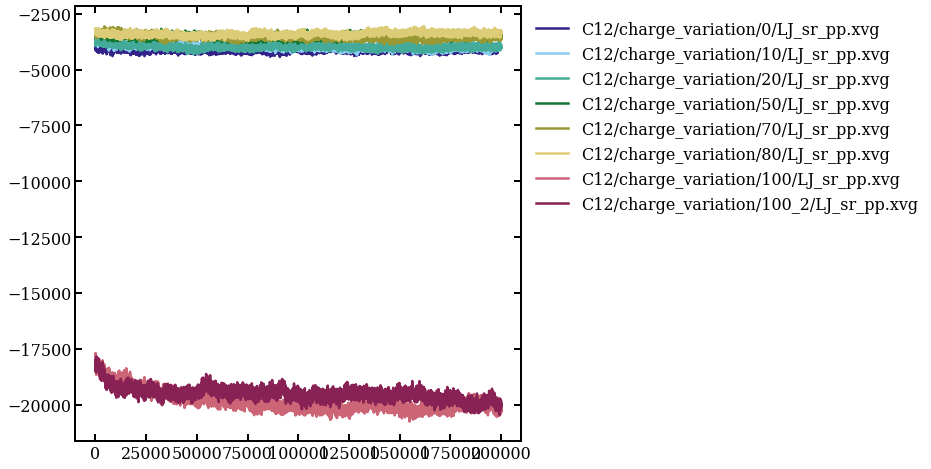

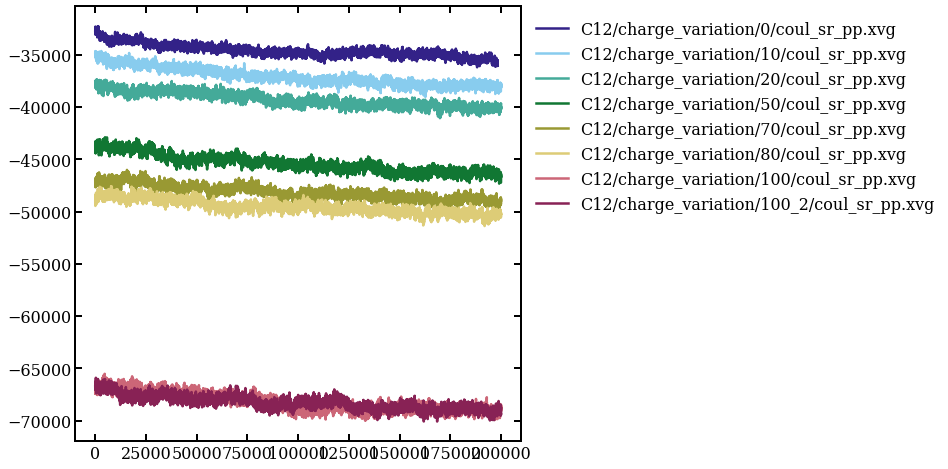

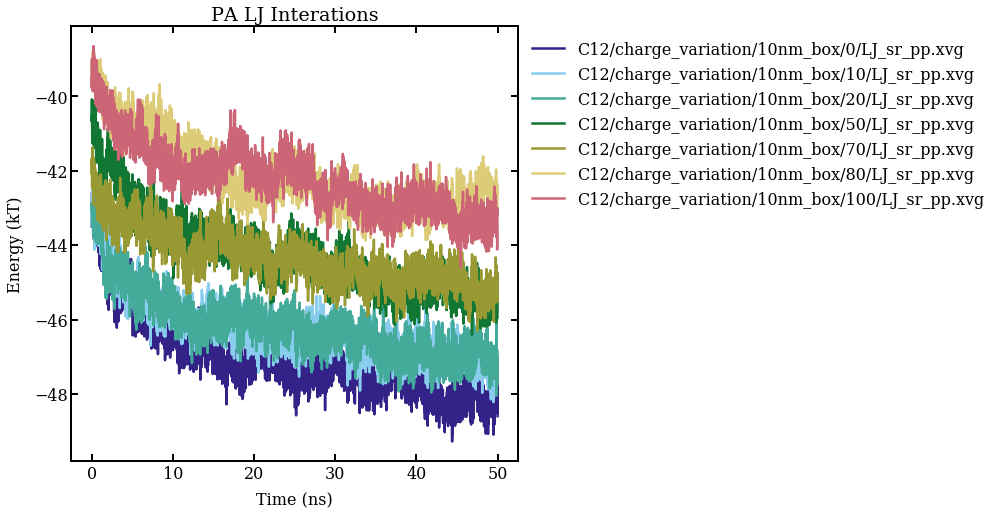

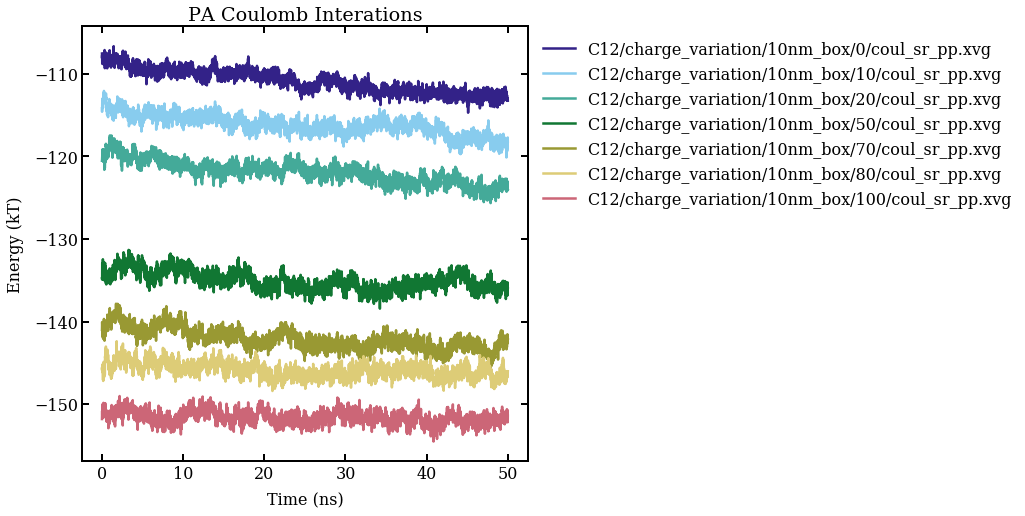

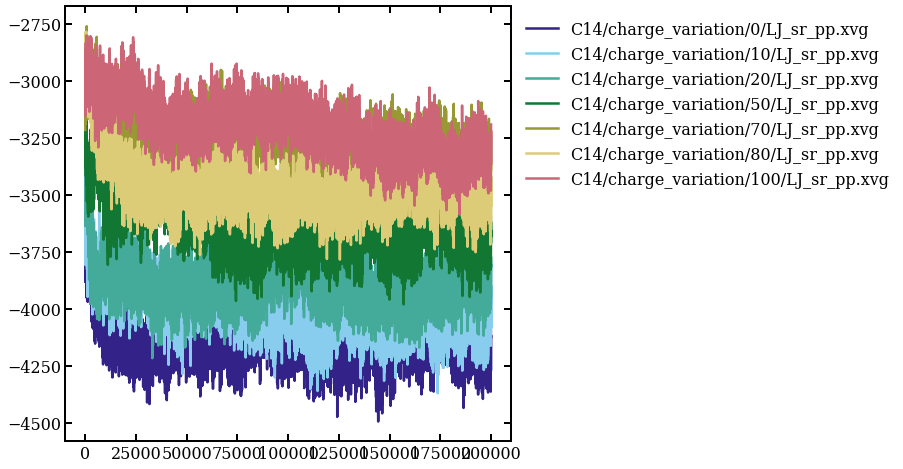

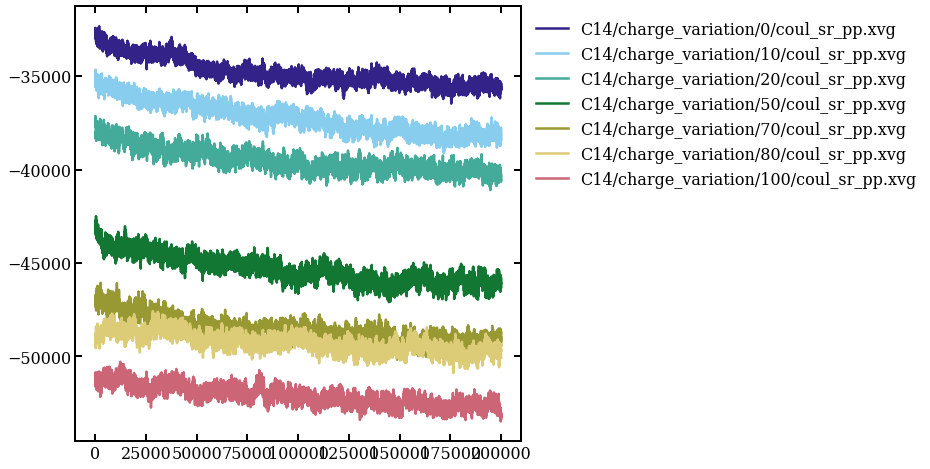

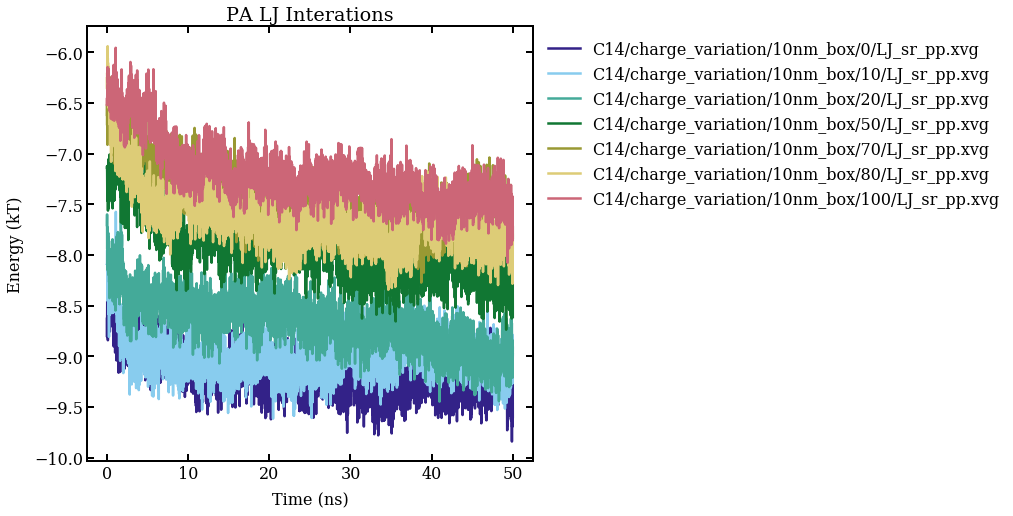

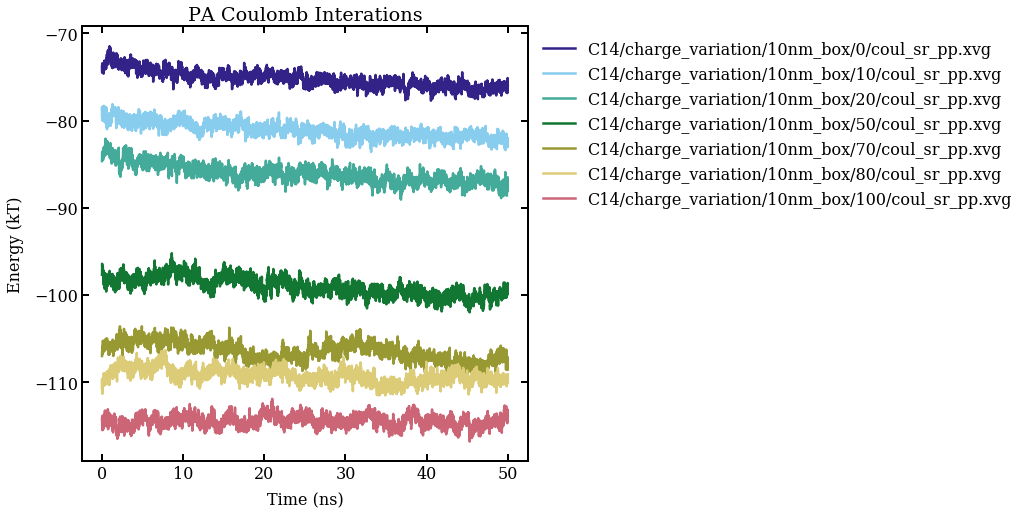

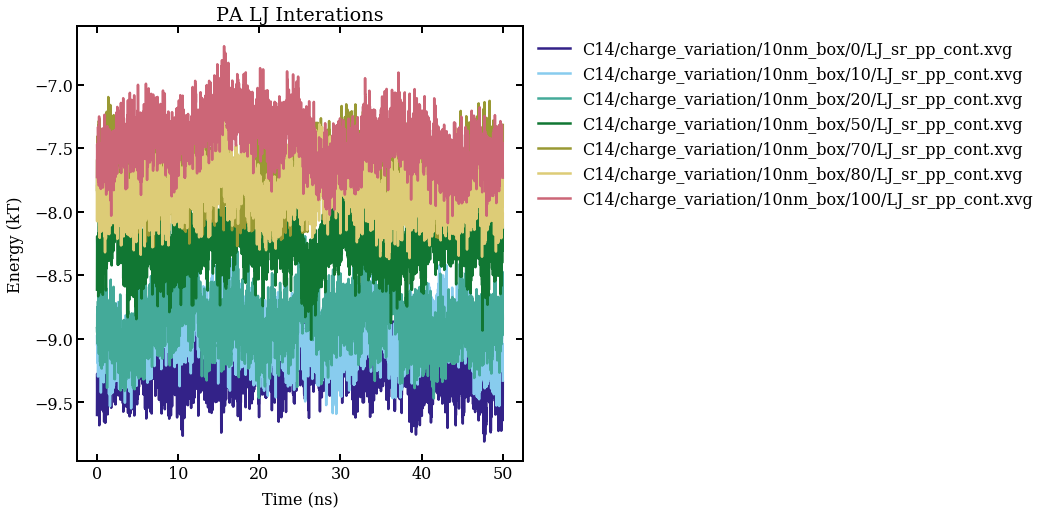

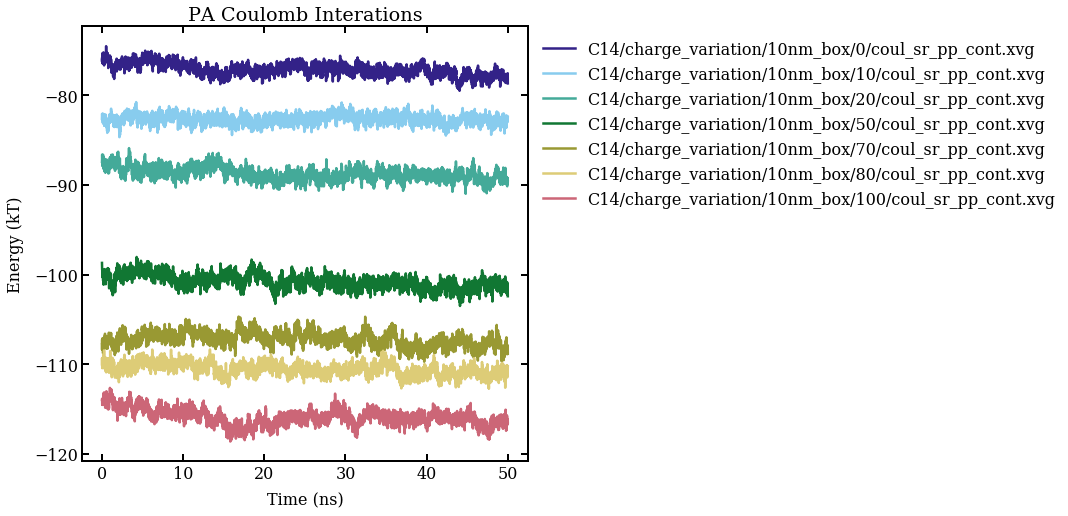

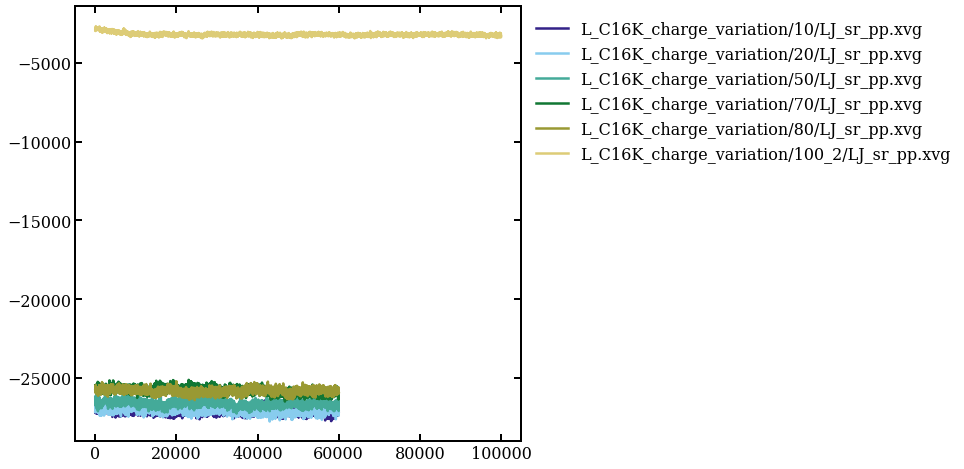

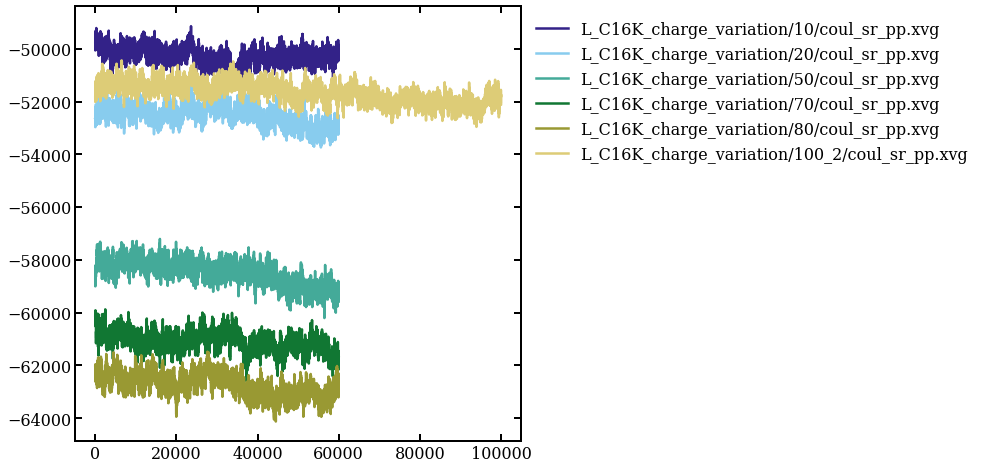

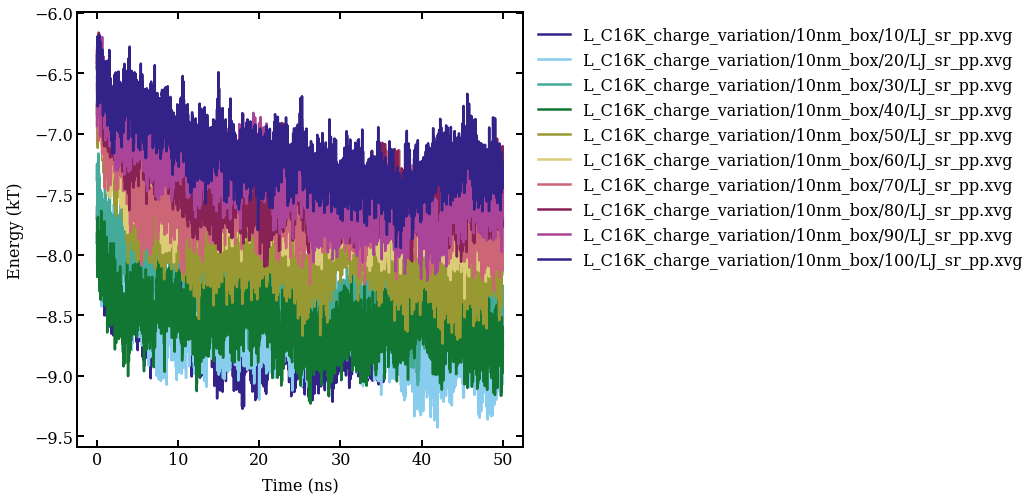

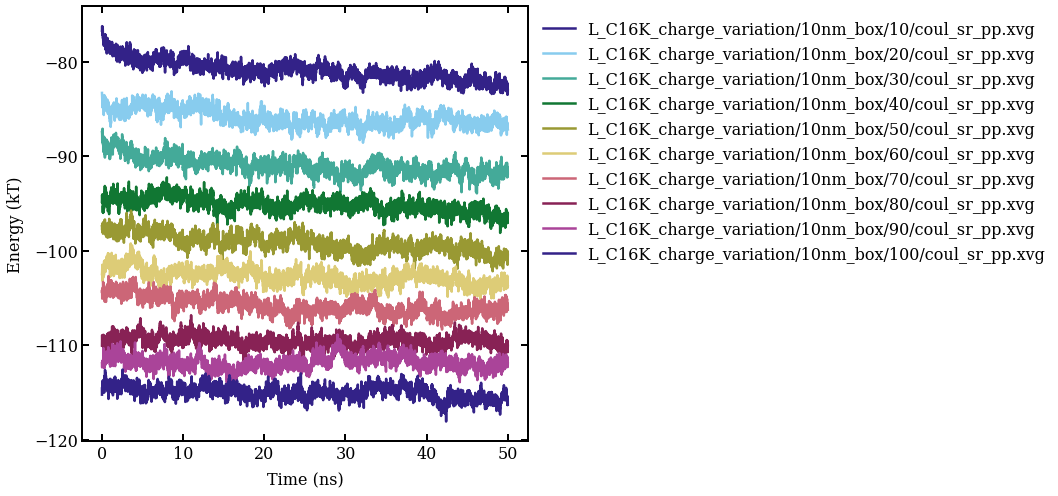

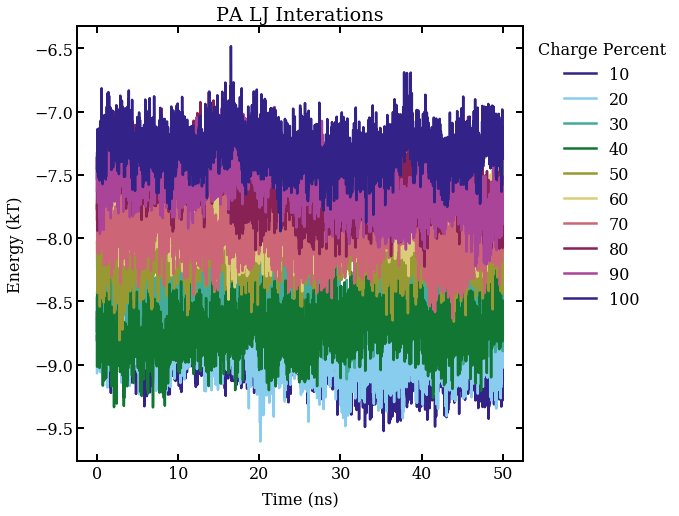

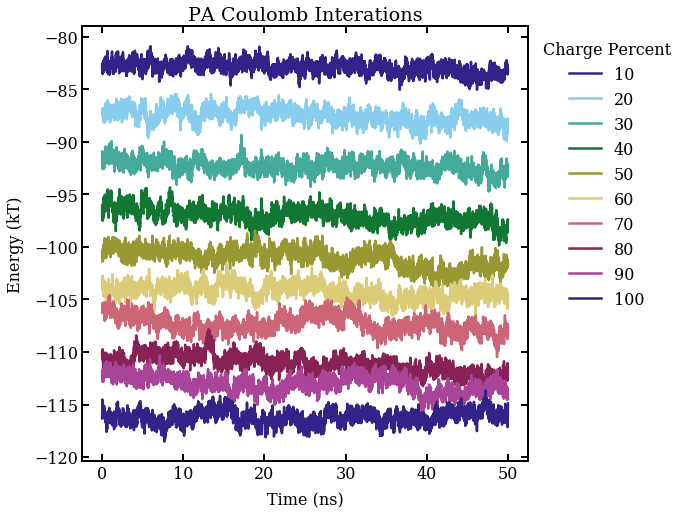

In [17]:
# Plotting C12 LJ_interactions and coulomb interactions
text_rows=24
columns = ["time","energy(kJ/mol)"]
charge=["0","10","20","50","70","80","100","100_2"]
dfs = []
file_names=[]
for c in charge:
    file = "C12/charge_variation/"+c+"/LJ_sr_pp.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
for file in file_names:
    df = res[file]
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
plt.legend(bbox_to_anchor =(1, 1))

text_rows=24
columns = ["time","energy(kJ/mol)"]
charge=["0","10","20","50","70","80","100","100_2"]
dfs = []
file_names=[]
for c in charge:
    file = "C12/charge_variation/"+c+"/coul_sr_pp.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
for file in file_names:
    df = res[file]
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
plt.legend(bbox_to_anchor =(1, 1))


# Plotting C12 10nm_box LJ_interactions and coulomb interactions
text_rows=24
columns = ["time","energy(kJ/mol)"]
charge=["0","10","20","50","70","80","100"]
dfs = []
file_names=[]
for c in charge:
    file = "C12/charge_variation/10nm_box/"+c+"/LJ_sr_pp.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
for file in file_names:
    df = res[file]
    plt.plot(df[df.columns[0]]/1000,df[df.columns[1]]/molecules/conv,label=file)
plt.legend(bbox_to_anchor =(1, 1))
plt.xlabel('Time (ns)')
plt.ylabel('Energy (kT)')
plt.title('PA LJ Interations')

text_rows=24
columns = ["time","energy(kJ/mol)"]
charge=["0","10","20","50","70","80","100"]
dfs = []
file_names=[]
for c in charge:
    file = "C12/charge_variation/10nm_box/"+c+"/coul_sr_pp.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
for file in file_names:
    df = res[file]
    plt.plot(df[df.columns[0]]/1000,df[df.columns[1]]/molecules/conv,label=file)
plt.legend(bbox_to_anchor =(1, 1))
plt.xlabel('Time (ns)')
plt.ylabel('Energy (kT)')
plt.title('PA Coulomb Interations')



# Plotting C14 LJ_interactions and coulomb interactions
text_rows=24
columns = ["time","energy(kJ/mol)"]
charge=["0","10","20","50","70","80","100"]#,"70_2"]
dfs = []
file_names=[]
for c in charge:
    file = "C14/charge_variation/"+c+"/LJ_sr_pp.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
for file in file_names:
    df = res[file]
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
plt.legend(bbox_to_anchor =(1, 1))

text_rows=24
columns = ["time","energy(kJ/mol)"]
charge=["0","10","20","50","70","80","100"]#,"70_2"]
dfs = []
file_names=[]
for c in charge:
    file = "C14/charge_variation/"+c+"/coul_sr_pp.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
for file in file_names:
    df = res[file]
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
plt.legend(bbox_to_anchor =(1, 1))



# Plotting C14 LJ_interactions and coulomb interactions
text_rows=24
columns = ["time","energy(kJ/mol)"]
charge=["0","10","20","50","70","80","100"]
dfs = []
file_names=[]
for c in charge:
    file = "C14/charge_variation/10nm_box/"+c+"/LJ_sr_pp.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
for file in file_names:
    df = res[file]
    plt.plot(df[df.columns[0]]/1000,df[df.columns[1]]/molecules/conv,label=file)
plt.legend(bbox_to_anchor =(1, 1))
plt.xlabel('Time (ns)')
plt.ylabel('Energy (kT)')
plt.title('PA LJ Interations')

text_rows=24
columns = ["time","energy(kJ/mol)"]
charge=["0","10","20","50","70","80","100"]
dfs = []
file_names=[]
for c in charge:
    file = "C14/charge_variation/10nm_box/"+c+"/coul_sr_pp.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
for file in file_names:
    df = res[file]
    plt.plot(df[df.columns[0]]/1000,df[df.columns[1]]/molecules/conv,label=file)
plt.legend(bbox_to_anchor =(1, 1))
plt.xlabel('Time (ns)')
plt.ylabel('Energy (kT)')
plt.title('PA Coulomb Interations')


# Plotting C14 LJ_interactions and coulomb interactions 10nm box cont
text_rows=24
columns = ["time","energy(kJ/mol)"]
charge=["0","10","20","50","70","80","100"]
dfs = []
file_names=[]
for c in charge:
    file = "C14/charge_variation/10nm_box/"+c+"/LJ_sr_pp_cont.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
for file in file_names:
    df = res[file]
    plt.plot(df[df.columns[0]]/1000,df[df.columns[1]]/molecules/conv,label=file)
plt.legend(bbox_to_anchor =(1, 1))
plt.xlabel('Time (ns)')
plt.ylabel('Energy (kT)')
plt.title('PA LJ Interations')

text_rows=24
columns = ["time","energy(kJ/mol)"]
charge=["0","10","20","50","70","80","100"]
dfs = []
file_names=[]
for c in charge:
    file = "C14/charge_variation/10nm_box/"+c+"/coul_sr_pp_cont.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
for file in file_names:
    df = res[file]
    plt.plot(df[df.columns[0]]/1000,df[df.columns[1]]/molecules/conv,label=file)
plt.legend(bbox_to_anchor =(1, 1))
plt.xlabel('Time (ns)')
plt.ylabel('Energy (kT)')
plt.title('PA Coulomb Interations')



# Plotting C16 LJ_interactions and coulomb interactions
text_rows=24
columns = ["time","energy(kJ/mol)"]
charge=["10","20","50","70","80","100_2"]
dfs = []
file_names=[]
for c in charge:
    file = "L_C16K_charge_variation/"+c+"/LJ_sr_pp.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
for file in file_names:
    df = res[file]
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
plt.legend(bbox_to_anchor =(1, 1))

text_rows=24
columns = ["time","energy(kJ/mol)"]
charge=["10","20","50","70","80","100_2"]
dfs = []
file_names=[]
for c in charge:
    file = "L_C16K_charge_variation/"+c+"/coul_sr_pp.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
for file in file_names:
    df = res[file]
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
plt.legend(bbox_to_anchor =(1, 1))

# Plotting C16 LJ_interactions and coulomb interactions 10nm_box
text_rows=24
columns = ["time","energy(kJ/mol)"]
charge=["10","20","30","40","50","60","70","80","90","100"]
dfs = []
file_names=[]
for c in charge:
    file = "L_C16K_charge_variation/10nm_box/"+c+"/LJ_sr_pp.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
for file in file_names:
    df = res[file]
    plt.plot(df[df.columns[0]]/1000,df[df.columns[1]]/molecules/conv,label=file)
plt.legend(bbox_to_anchor =(1, 1))
plt.xlabel('Time (ns)')
plt.ylabel('Energy (kT)')

text_rows=24
columns = ["time","energy(kJ/mol)"]
charge=["10","20","30","40","50","60","70","80","90","100"]
dfs = []
file_names=[]
for c in charge:
    file = "L_C16K_charge_variation/10nm_box/"+c+"/coul_sr_pp.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
for file in file_names:
    df = res[file]
    plt.plot(df[df.columns[0]]/1000,df[df.columns[1]]/molecules/conv,label=file)
plt.legend(bbox_to_anchor =(1, 1))
plt.xlabel('Time (ns)')
plt.ylabel('Energy (kT)')

# Plotting C16 LJ_interactions and coulomb interactions 10nm_box, cont
text_rows=24
columns = ["time","energy(kJ/mol)"]
charge=["10","20","30","40","50","60","70","80","90","100"]
dfs = []
file_names=[]
for c in charge:
    file = "L_C16K_charge_variation/10nm_box/"+c+"/LJ_sr_pp_cont.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
i=0
for file in file_names:
    df = res[file]
    #plt.plot(df[df.columns[0]]/1000,df[df.columns[1]]/molecules/conv,label=file)
    plt.plot(df[df.columns[0]]/1000,df[df.columns[1]]/molecules/conv,label=charge[i])
    i+=1
plt.legend(bbox_to_anchor =(1, 1),title="Charge Percent")
plt.xlabel('Time (ns)')
plt.ylabel('Energy (kT)')
plt.title('PA LJ Interations')


text_rows=24
columns = ["time","energy(kJ/mol)"]
charge=["10","20","30","40","50","60","70","80","90","100"]
dfs = []
file_names=[]
for c in charge:
    file = "L_C16K_charge_variation/10nm_box/"+c+"/coul_sr_pp_cont.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

    
res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
i=0
for file in file_names:
    df = res[file]
    #plt.plot(df[df.columns[0]]/1000,df[df.columns[1]]/molecules/conv,label=file)
    plt.plot(df[df.columns[0]]/1000,df[df.columns[1]]/molecules/conv,label=charge[i])
    i+=1
plt.legend(bbox_to_anchor =(1, 1),title="Charge Percent")
plt.xlabel('Time (ns)')
plt.ylabel('Energy (kT)')
plt.title('PA Coulomb Interations')


Text(0.5, 1.0, 'PA LJ Interations')

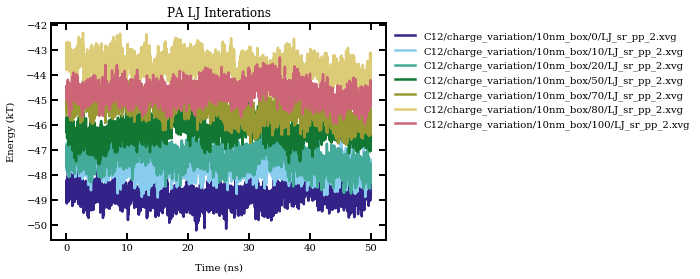

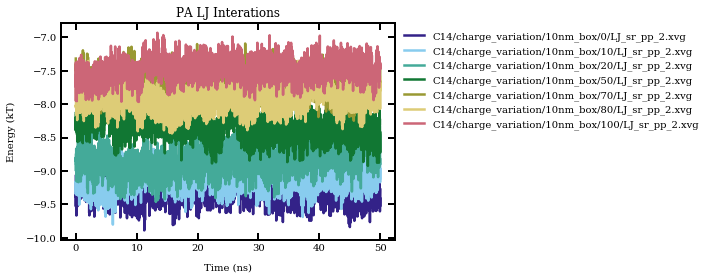

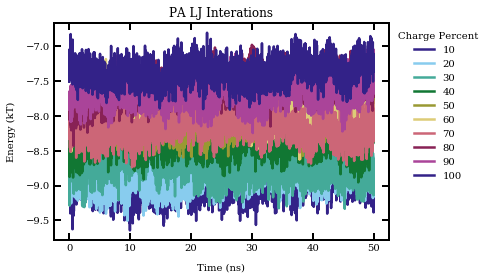

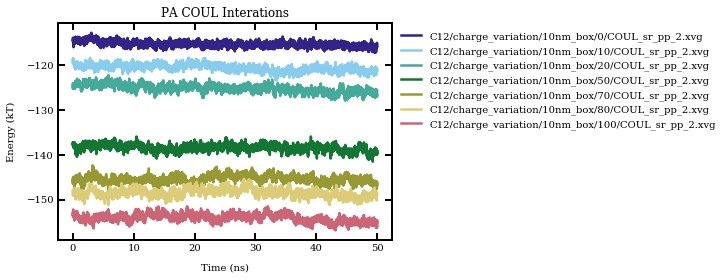

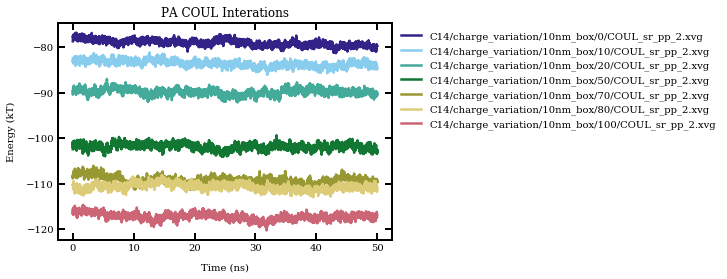

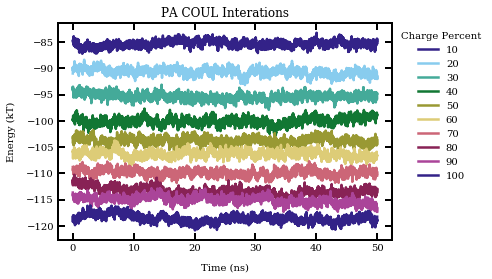

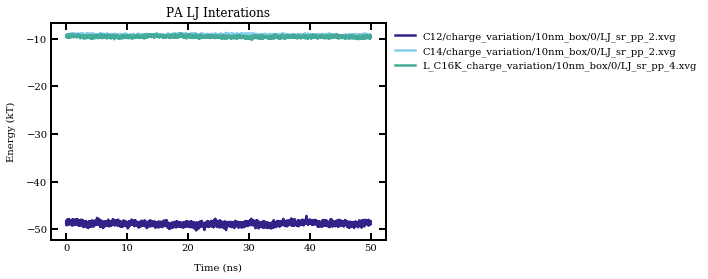

In [6]:
# Plotting C12 LJ_interactions and coulomb interactions 10nm box cont_2
text_rows=24
columns = ["time","energy(kJ/mol)"]
charge=["0","10","20","50","70","80","100"]
dfs = []
file_names=[]
for c in charge:
    file = "C12/charge_variation/10nm_box/"+c+"/LJ_sr_pp_2.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
for file in file_names:
    df = res[file]
    plt.plot(df[df.columns[0]]/1000,df[df.columns[1]]/molecules/conv,label=file)
plt.legend(bbox_to_anchor =(1, 1))
plt.xlabel('Time (ns)')
plt.ylabel('Energy (kT)')
plt.title('PA LJ Interations')

# Plotting C14 LJ_interactions and coulomb interactions 10nm box cont_2
text_rows=24
columns = ["time","energy(kJ/mol)"]
charge=["0","10","20","50","70","80","100"]
dfs = []
file_names=[]
for c in charge:
    file = "C14/charge_variation/10nm_box/"+c+"/LJ_sr_pp_2.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
for file in file_names:
    df = res[file]
    plt.plot(df[df.columns[0]]/1000,df[df.columns[1]]/molecules/conv,label=file)
plt.legend(bbox_to_anchor =(1, 1))
plt.xlabel('Time (ns)')
plt.ylabel('Energy (kT)')
plt.title('PA LJ Interations')


# Plotting C16 LJ_interactions and coulomb interactions 10nm box cont_4
text_rows=24
columns = ["time","energy(kJ/mol)"]
charge=["10","20","30","40","50","60","70","80","90","100"]
dfs = []
file_names=[]
for c in charge:
    file = "L_C16K_charge_variation/10nm_box/"+c+"/LJ_sr_pp_4.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

    
res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
i=0
for file in file_names:
    df = res[file]
    #plt.plot(df[df.columns[0]]/1000,df[df.columns[1]]/molecules/conv,label=file)
    plt.plot(df[df.columns[0]]/1000,df[df.columns[1]]/molecules/conv,label=charge[i])
    i+=1
plt.legend(bbox_to_anchor =(1, 1),title="Charge Percent")
plt.xlabel('Time (ns)')
plt.ylabel('Energy (kT)')
plt.title('PA LJ Interations')




# Plotting C12 LJ_interactions and coulomb interactions 10nm box cont_2
text_rows=24
columns = ["time","energy(kJ/mol)"]
charge=["0","10","20","50","70","80","100"]
dfs = []
file_names=[]
for c in charge:
    file = "C12/charge_variation/10nm_box/"+c+"/COUL_sr_pp_2.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
for file in file_names:
    df = res[file]
    plt.plot(df[df.columns[0]]/1000,df[df.columns[1]]/molecules/conv,label=file)
plt.legend(bbox_to_anchor =(1, 1))
plt.xlabel('Time (ns)')
plt.ylabel('Energy (kT)')
plt.title('PA COUL Interations')

# Plotting C14 LJ_interactions and coulomb interactions 10nm box cont_2
text_rows=24
columns = ["time","energy(kJ/mol)"]
charge=["0","10","20","50","70","80","100"]
dfs = []
file_names=[]
for c in charge:
    file = "C14/charge_variation/10nm_box/"+c+"/COUL_sr_pp_2.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
for file in file_names:
    df = res[file]
    plt.plot(df[df.columns[0]]/1000,df[df.columns[1]]/molecules/conv,label=file)
plt.legend(bbox_to_anchor =(1, 1))
plt.xlabel('Time (ns)')
plt.ylabel('Energy (kT)')
plt.title('PA COUL Interations')


# Plotting C16 LJ_interactions and coulomb interactions 10nm box cont_4
text_rows=24
columns = ["time","energy(kJ/mol)"]
charge=["10","20","30","40","50","60","70","80","90","100"]
dfs = []
file_names=[]
for c in charge:
    file = "L_C16K_charge_variation/10nm_box/"+c+"/COUL_sr_pp_4.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

    
res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
i=0
for file in file_names:
    df = res[file]
    #plt.plot(df[df.columns[0]]/1000,df[df.columns[1]]/molecules/conv,label=file)
    plt.plot(df[df.columns[0]]/1000,df[df.columns[1]]/molecules/conv,label=charge[i])
    i+=1
plt.legend(bbox_to_anchor =(1, 1),title="Charge Percent")
plt.xlabel('Time (ns)')
plt.ylabel('Energy (kT)')
plt.title('PA COUL Interations')





Text(0.5, 1.0, 'PA COUL Interations, 70% Charge')

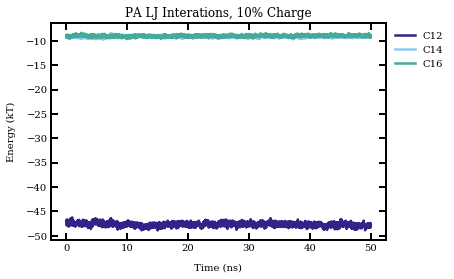

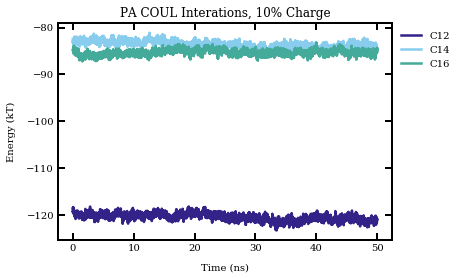

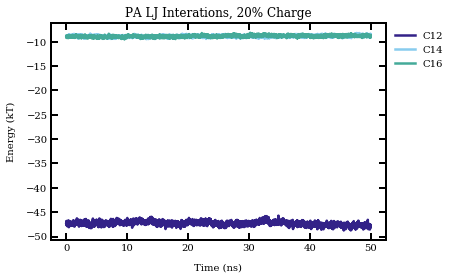

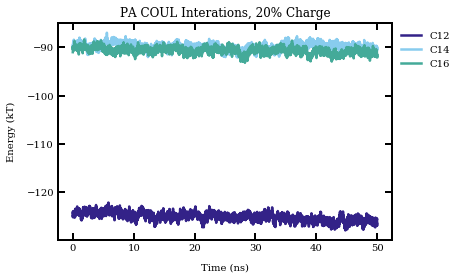

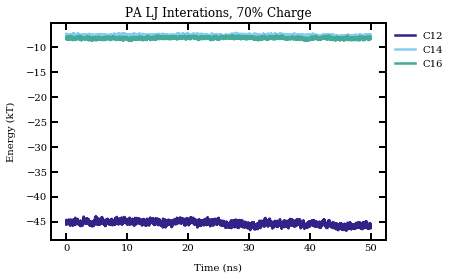

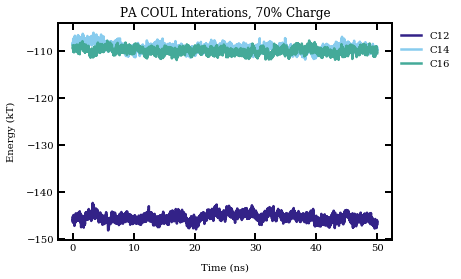

In [13]:
# Plotting C12 LJ_interactions and coulomb interactions 10nm box cont_2
text_rows=24
columns = ["time","energy(kJ/mol)"]
charge=["10"]#,"50","100"]
dfs = []
file_names=[]
for c in charge:
    file = "C12/charge_variation/10nm_box/"+c+"/LJ_sr_pp_2.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    file = "C14/charge_variation/10nm_box/"+c+"/LJ_sr_pp_2.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    file = "L_C16K_charge_variation/10nm_box/"+c+"/LJ_sr_pp_4.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
label_list=["C12","C14","C16"]
i=0
for file in file_names:
    df = res[file]
    #plt.plot(df[df.columns[0]]/1000,df[df.columns[1]]/molecules/conv,label=file)
    plt.plot(df[df.columns[0]]/1000,df[df.columns[1]]/molecules/conv,label=label_list[i])
    i+=1
plt.legend(bbox_to_anchor =(1, 1))
plt.xlabel('Time (ns)')
plt.ylabel('Energy (kT)')
plt.title('PA LJ Interations, {}% Charge'.format(charge[0]))


# Plotting C12 LJ_interactions and coulomb interactions 10nm box cont_2
text_rows=24
columns = ["time","energy(kJ/mol)"]
charge=["10"]#,"50","100"]
dfs = []
file_names=[]
for c in charge:
    file = "C12/charge_variation/10nm_box/"+c+"/COUL_sr_pp_2.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    file = "C14/charge_variation/10nm_box/"+c+"/COUL_sr_pp_2.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    file = "L_C16K_charge_variation/10nm_box/"+c+"/COUL_sr_pp_4.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
label_list=["C12","C14","C16"]
i=0
for file in file_names:
    df = res[file]
    #plt.plot(df[df.columns[0]]/1000,df[df.columns[1]]/molecules/conv,label=file)
    plt.plot(df[df.columns[0]]/1000,df[df.columns[1]]/molecules/conv,label=label_list[i])
    i+=1
plt.legend(bbox_to_anchor =(1, 1))
plt.xlabel('Time (ns)')
plt.ylabel('Energy (kT)')
plt.title('PA COUL Interations, {}% Charge'.format(charge[0]))






# Plotting C12 LJ_interactions and coulomb interactions 10nm box cont_2
text_rows=24
columns = ["time","energy(kJ/mol)"]
charge=["20"]
dfs = []
file_names=[]
for c in charge:
    file = "C12/charge_variation/10nm_box/"+c+"/LJ_sr_pp_2.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    file = "C14/charge_variation/10nm_box/"+c+"/LJ_sr_pp_2.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    file = "L_C16K_charge_variation/10nm_box/"+c+"/LJ_sr_pp_4.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
label_list=["C12","C14","C16"]
i=0
for file in file_names:
    df = res[file]
    #plt.plot(df[df.columns[0]]/1000,df[df.columns[1]]/molecules/conv,label=file)
    plt.plot(df[df.columns[0]]/1000,df[df.columns[1]]/molecules/conv,label=label_list[i])
    i+=1
plt.legend(bbox_to_anchor =(1, 1))
plt.xlabel('Time (ns)')
plt.ylabel('Energy (kT)')
plt.title('PA LJ Interations, {}% Charge'.format(charge[0]))


# Plotting C12 LJ_interactions and coulomb interactions 10nm box cont_2
text_rows=24
columns = ["time","energy(kJ/mol)"]
charge=["20"]
dfs = []
file_names=[]
for c in charge:
    file = "C12/charge_variation/10nm_box/"+c+"/COUL_sr_pp_2.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    file = "C14/charge_variation/10nm_box/"+c+"/COUL_sr_pp_2.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    file = "L_C16K_charge_variation/10nm_box/"+c+"/COUL_sr_pp_4.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
label_list=["C12","C14","C16"]
i=0
for file in file_names:
    df = res[file]
    #plt.plot(df[df.columns[0]]/1000,df[df.columns[1]]/molecules/conv,label=file)
    plt.plot(df[df.columns[0]]/1000,df[df.columns[1]]/molecules/conv,label=label_list[i])
    i+=1
plt.legend(bbox_to_anchor =(1, 1))
plt.xlabel('Time (ns)')
plt.ylabel('Energy (kT)')
plt.title('PA COUL Interations, {}% Charge'.format(charge[0]))





# Plotting C12 LJ_interactions and coulomb interactions 10nm box cont_2
text_rows=24
columns = ["time","energy(kJ/mol)"]
charge=["70"]
dfs = []
file_names=[]
for c in charge:
    file = "C12/charge_variation/10nm_box/"+c+"/LJ_sr_pp_2.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    file = "C14/charge_variation/10nm_box/"+c+"/LJ_sr_pp_2.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    file = "L_C16K_charge_variation/10nm_box/"+c+"/LJ_sr_pp_4.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
label_list=["C12","C14","C16"]
i=0
for file in file_names:
    df = res[file]
    #plt.plot(df[df.columns[0]]/1000,df[df.columns[1]]/molecules/conv,label=file)
    plt.plot(df[df.columns[0]]/1000,df[df.columns[1]]/molecules/conv,label=label_list[i])
    i+=1
plt.legend(bbox_to_anchor =(1, 1))
plt.xlabel('Time (ns)')
plt.ylabel('Energy (kT)')
plt.title('PA LJ Interations, {}% Charge'.format(charge[0]))


# Plotting C12 LJ_interactions and coulomb interactions 10nm box cont_2
text_rows=24
columns = ["time","energy(kJ/mol)"]
charge=["70"]
dfs = []
file_names=[]
for c in charge:
    file = "C12/charge_variation/10nm_box/"+c+"/COUL_sr_pp_2.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    file = "C14/charge_variation/10nm_box/"+c+"/COUL_sr_pp_2.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    file = "L_C16K_charge_variation/10nm_box/"+c+"/COUL_sr_pp_4.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
label_list=["C12","C14","C16"]
i=0
for file in file_names:
    df = res[file]
    #plt.plot(df[df.columns[0]]/1000,df[df.columns[1]]/molecules/conv,label=file)
    plt.plot(df[df.columns[0]]/1000,df[df.columns[1]]/molecules/conv,label=label_list[i])
    i+=1
plt.legend(bbox_to_anchor =(1, 1))
plt.xlabel('Time (ns)')
plt.ylabel('Energy (kT)')
plt.title('PA COUL Interations, {}% Charge'.format(charge[0]))

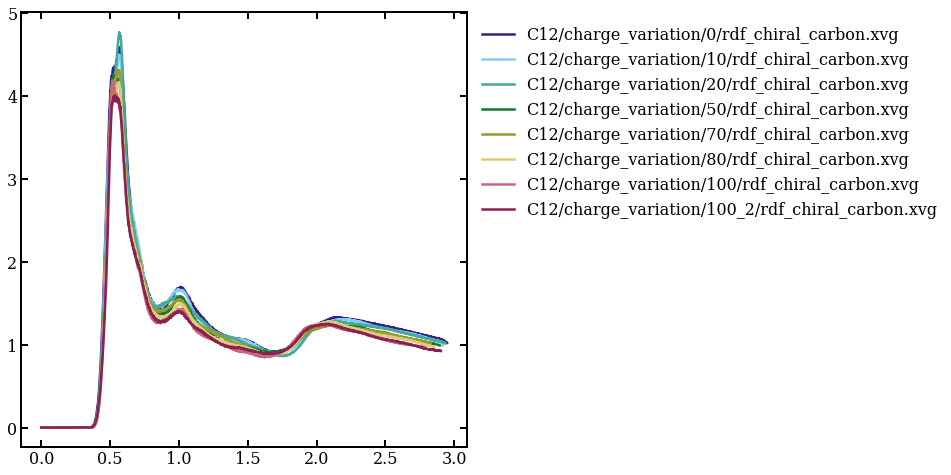

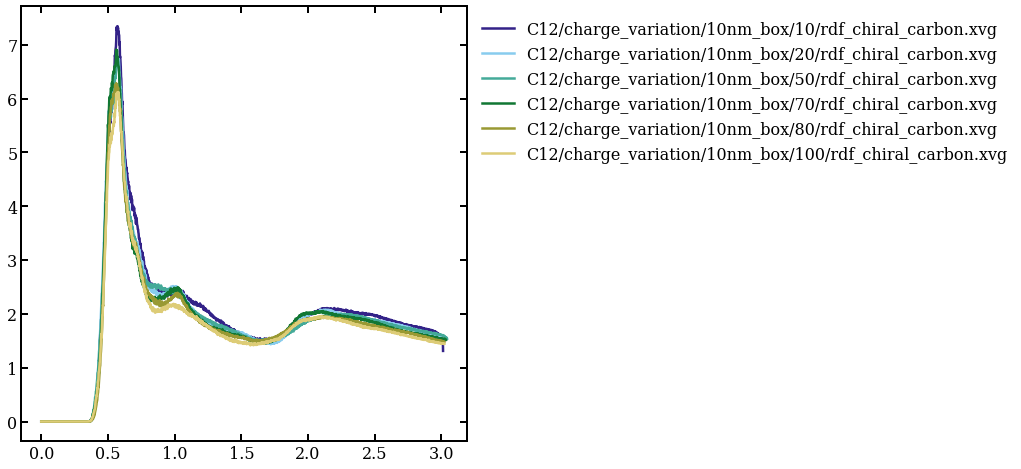

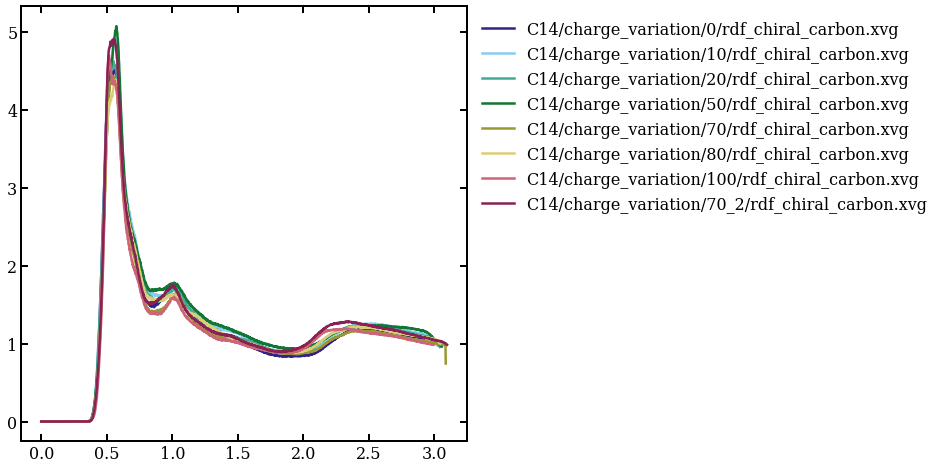

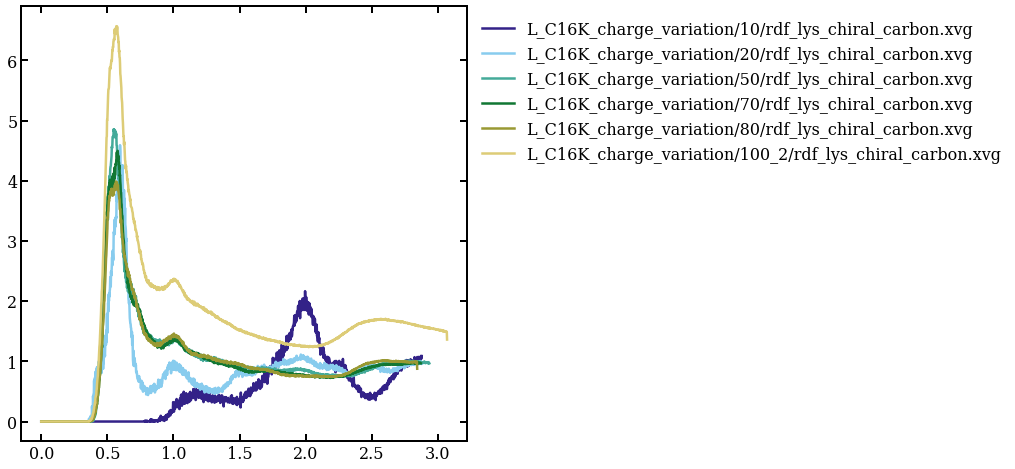

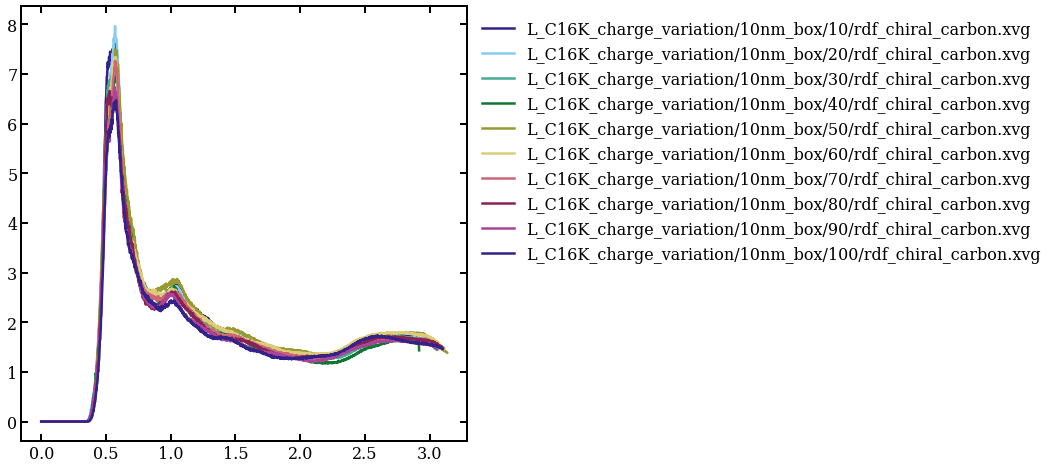

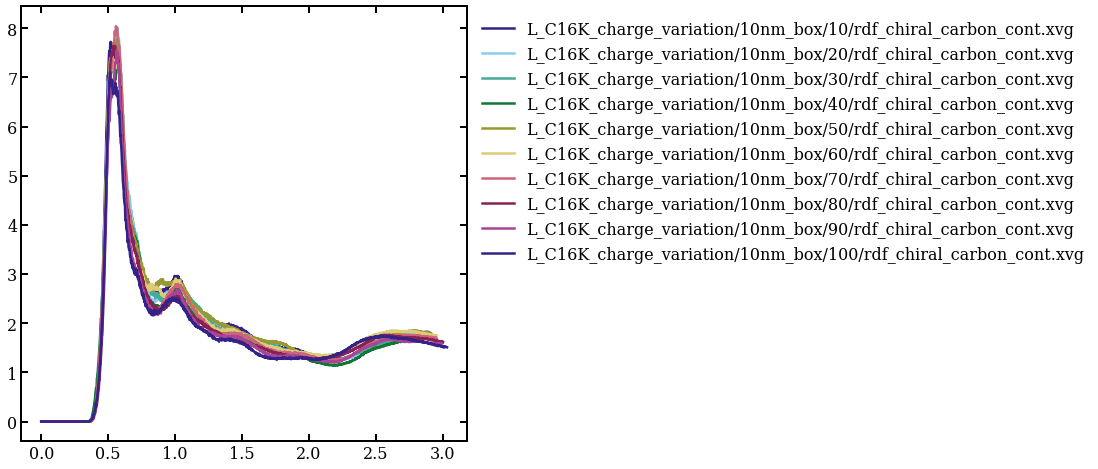

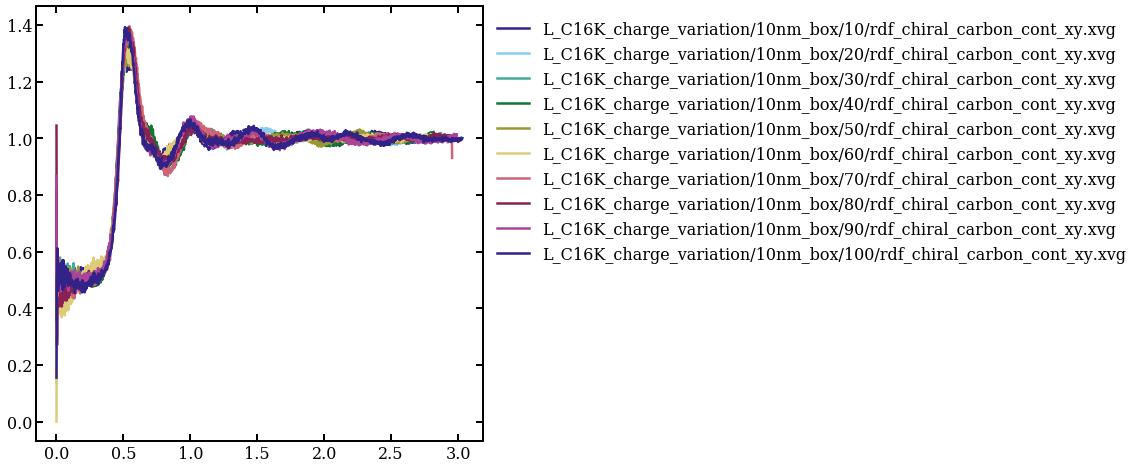

In [18]:
# Plotting C12 rdf
text_rows=25
columns = ["r","g(r)"]
charge=["0","10","20","50","70","80","100","100_2"]
dfs = []
file_names=[]
for c in charge:
    file = "C12/charge_variation/"+c+"/rdf_chiral_carbon.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
for file in file_names:
    df = res[file]
    peak_index=find_peaks(df['g(r)'],height=400)[0]
    for index in peak_index:
        plt.scatter(df['r'][index],df['g(r)'][index],color="#AA4499")
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
plt.legend(bbox_to_anchor =(1, 1))

# Plotting C12 10nm_box rdf
text_rows=25
columns = ["r","g(r)"]
charge=["10","20","50","70","80","100"]
dfs = []
file_names=[]
for c in charge:
    file = "C12/charge_variation/10nm_box/"+c+"/rdf_chiral_carbon.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
for file in file_names:
    df = res[file]
    peak_index=find_peaks(df['g(r)'],height=400)[0]
    for index in peak_index:
        plt.scatter(df['r'][index],df['g(r)'][index],color="#AA4499")
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
plt.legend(bbox_to_anchor =(1, 1))

# Plotting C14 rdf
text_rows=25
columns = ["r","g(r)"]
charge=["0","10","20","50","70","80","100","70_2"]
dfs = []
file_names=[]
for c in charge:
    file = "C14/charge_variation/"+c+"/rdf_chiral_carbon.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
for file in file_names:
    df = res[file]
    peak_index=find_peaks(df['g(r)'],height=400)[0]
    for index in peak_index:
        plt.scatter(df['r'][index],df['g(r)'][index],color="#AA4499")
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
plt.legend(bbox_to_anchor =(1, 1))


# Plotting C16 rdf
text_rows=25
columns = ["r","g(r)"]
charge=["10","20","50","70","80","100_2"]
dfs = []
file_names=[]
for c in charge:
    file = "L_C16K_charge_variation/"+c+"/rdf_lys_chiral_carbon.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
for file in file_names:
    df = res[file]
    peak_index=find_peaks(df['g(r)'],height=400)[0]
    for index in peak_index:
        plt.scatter(df['r'][index],df['g(r)'][index],color="#AA4499")
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
plt.legend(bbox_to_anchor =(1, 1))

# Plotting C16 rdf 10nm_box
text_rows=25
columns = ["r","g(r)"]
charge=["10","20","30","40","50","60","70","80","90","100"]
dfs = []
file_names=[]
for c in charge:
    file = "L_C16K_charge_variation/10nm_box/"+c+"/rdf_chiral_carbon.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
for file in file_names:
    df = res[file]
    peak_index=find_peaks(df['g(r)'],height=400)[0]
    for index in peak_index:
        plt.scatter(df['r'][index],df['g(r)'][index],color="#AA4499")
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
plt.legend(bbox_to_anchor =(1, 1))

# Plotting C16 rdf 10nm_box
text_rows=25
columns = ["r","g(r)"]
charge=["10","20","30","40","50","60","70","80","90","100"]
dfs = []
file_names=[]
for c in charge:
    file = "L_C16K_charge_variation/10nm_box/"+c+"/rdf_chiral_carbon_cont.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
for file in file_names:
    df = res[file]
    peak_index=find_peaks(df['g(r)'],height=400)[0]
    for index in peak_index:
        plt.scatter(df['r'][index],df['g(r)'][index],color="#AA4499")
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
plt.legend(bbox_to_anchor =(1, 1))

# Plotting C16 rdf 10nm_box
text_rows=25
columns = ["r","g(r)"]
charge=["10","20","30","40","50","60","70","80","90","100"]
dfs = []
file_names=[]
for c in charge:
    file = "L_C16K_charge_variation/10nm_box/"+c+"/rdf_chiral_carbon_cont_xy.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
for file in file_names:
    df = res[file]
    peak_index=find_peaks(df['g(r)'],height=400)[0]
    for index in peak_index:
        plt.scatter(df['r'][index],df['g(r)'][index],color="#AA4499")
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
plt.legend(bbox_to_anchor =(1, 1))




100%|██████████| 10/10 [00:17<00:00,  1.74s/it]


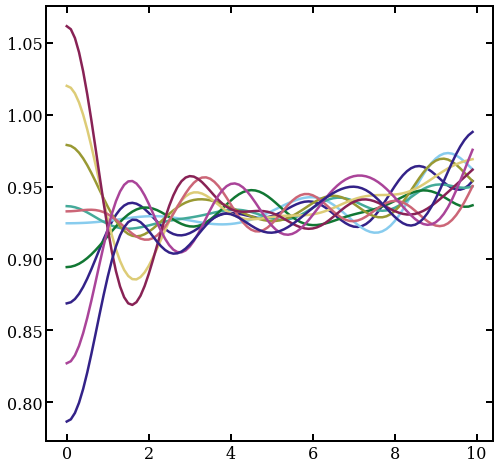

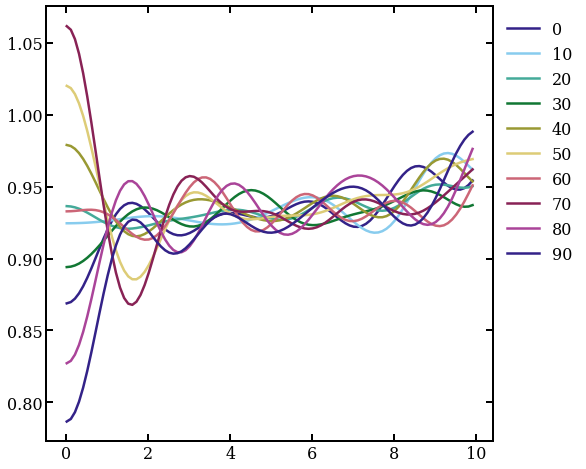

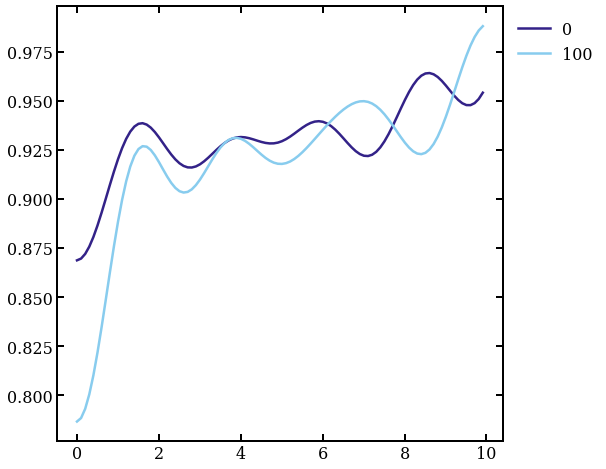

In [19]:
#structure factor calculations

s_list=[]
for j in tqdm(range(0,len(dfs))):
    q_values=np.arange(0.001,10,0.1)
    structure_factor=[]
    rho=1
    r_values=dfs[j]['r'].values
    for q in q_values:
        r_int = []
        for i in range(0, len(r_values)):
            r_int.append(r_values[i]*np.sin(q*r_values[i])*(dfs[j]["g(r)"][i]-1))
        temp = integrate.trapz(r_int,r_values)
        temp*=4*np.pi*rho/q
        temp+=1
        structure_factor.append(temp)
    s_list.append(structure_factor)

for s in s_list:
    plt.plot(q_values,s)
    
#structure factor calculations
s_list=[]
for j in range(0,len(dfs)):
    q_values=np.arange(0.01,10,0.1)
    structure_factor=[]
    rho=1
    r_values=dfs[j]['r'].values
    for q in q_values:
        r_int = []
        for i in range(0, len(r_values)):
            r_int.append(r_values[i]*np.sin(q*r_values[i])*(dfs[j]["g(r)"][i]-1))
        temp = integrate.trapz(r_int,r_values)
        temp*=4*np.pi*rho/q
        temp+=1
        structure_factor.append(temp)
    s_list.append(structure_factor)
plt.figure()
label=0
for s in s_list:
    plt.plot(q_values,s,label=label)
    label+=10
plt.legend(bbox_to_anchor =(1, 1))


s_list_2=[s_list[0],s_list[len(s_list)-1]]
plt.figure()
label=0
for s in s_list_2:
    plt.plot(q_values,s,label=label)
    label+=100
plt.legend(bbox_to_anchor =(1, 1)) 

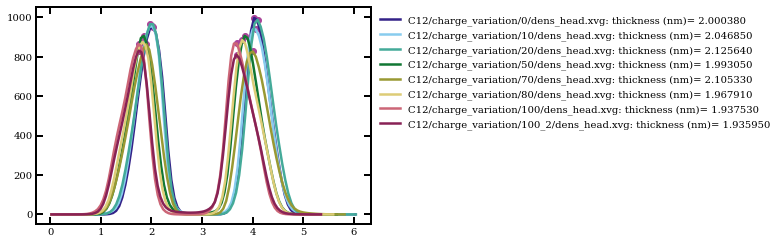

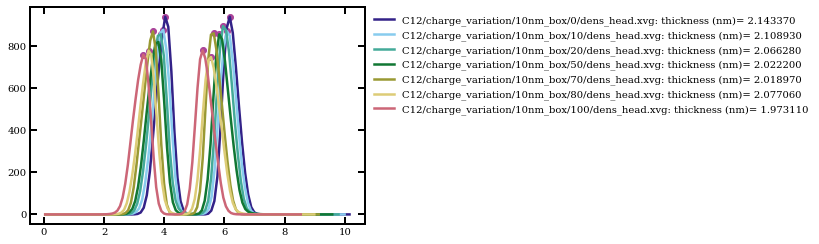

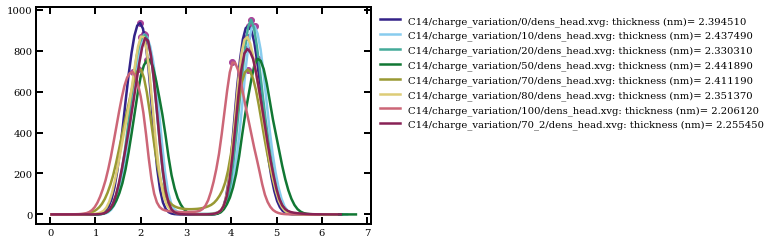

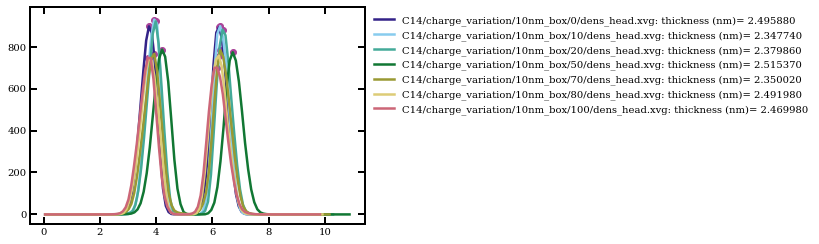

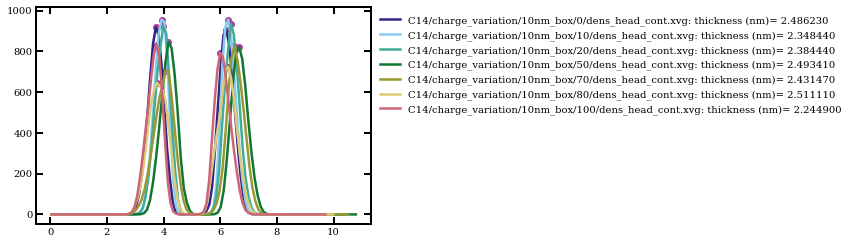

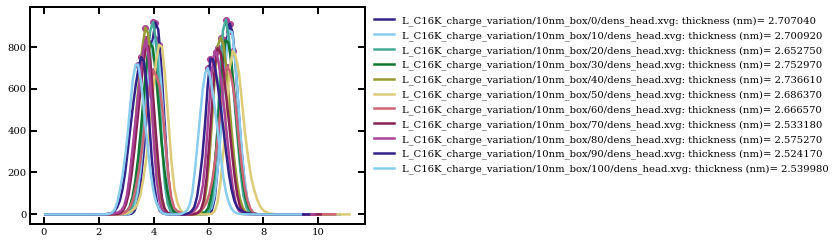

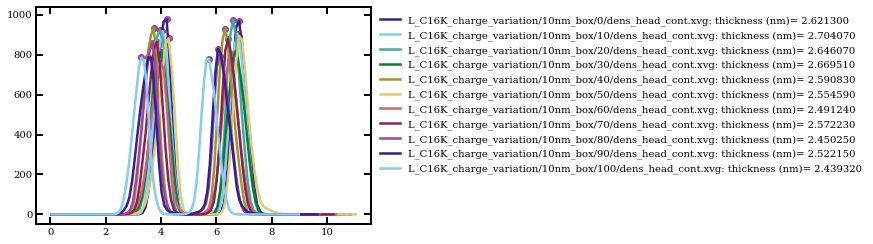

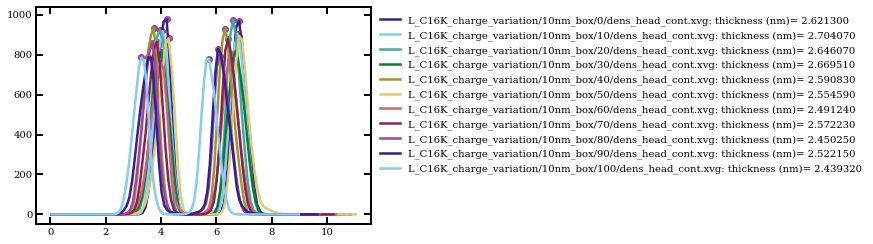

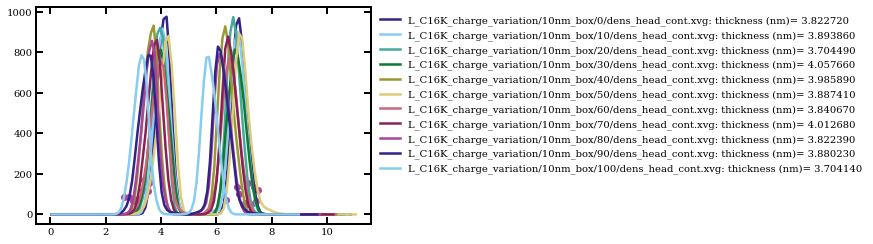

In [13]:
# Plotting headgroup densities C12
text_rows=24
group = "head"
columns = ["z","density"]
charge=["0","10","20","50","70","80","100","100_2"]
dfs = []
file_names=[]
for c in charge:
    file = "C12/charge_variation/"+c+"/dens_"+group+".xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
for file in file_names:
    df = res[file]
    peak_index=find_peaks(df['density'],height=400)[0]
    for index in peak_index:
        plt.scatter(df['z'][index],df['density'][index],color="#AA4499")
    height = df['z'][peak_index[1]]-df['z'][peak_index[0]]
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file+": thickness (nm)= %f"%height)
plt.legend(bbox_to_anchor =(1, 1))

# Plotting headgroup densities C12 10nm_box
text_rows=24
group = "head"
columns = ["z","density"]
charge=["0","10","20","50","70","80","100"]
dfs = []
file_names=[]
for c in charge:
    file = "C12/charge_variation/10nm_box/"+c+"/dens_"+group+".xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
heights_12=[]
for file in file_names:
    df = res[file]
    peak_index=find_peaks(df['density'],height=400)[0]
    for index in peak_index:
        plt.scatter(df['z'][index],df['density'][index],color="#AA4499")
    height = df['z'][peak_index[1]]-df['z'][peak_index[0]]
    heights_12.append(height)
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file+": thickness (nm)= %f"%height)
plt.legend(bbox_to_anchor =(1, 1))



# Plotting headgroup densities C14
text_rows=24
group = "head"
columns = ["z","density"]
charge=["0","10","20","50","70","80","100","70_2"]
dfs = []
file_names=[]
for c in charge:
    file = "C14/charge_variation/"+c+"/dens_"+group+".xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

plt.figure()
res = {file_names[i]: dfs[i] for i in range(len(dfs))}
for file in file_names:
    df = res[file]
    peak_index=find_peaks(df['density'],height=400)[0]
    for index in peak_index:
        plt.scatter(df['z'][index],df['density'][index],color="#AA4499")
    height = df['z'][peak_index[1]]-df['z'][peak_index[0]]
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file+": thickness (nm)= %f"%height)
plt.legend(bbox_to_anchor =(1, 1))


# Plotting headgroup densities C14
text_rows=24
group = "head"
columns = ["z","density"]
charge=["0","10","20","50","70","80","100"]
dfs = []
file_names=[]
for c in charge:
    file = "C14/charge_variation/10nm_box/"+c+"/dens_"+group+".xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

plt.figure()
res = {file_names[i]: dfs[i] for i in range(len(dfs))}
heights_14=[]
for file in file_names:
    df = res[file]
    peak_index=find_peaks(df['density'],height=400)[0]
    for index in peak_index:
        plt.scatter(df['z'][index],df['density'][index],color="#AA4499")
    height = df['z'][peak_index[1]]-df['z'][peak_index[0]]
    heights_14.append(height)
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file+": thickness (nm)= %f"%height)
plt.legend(bbox_to_anchor =(1, 1))

# Plotting headgroup densities C14 10nm box cont
text_rows=24
group = "head"
columns = ["z","density"]
charge=["0","10","20","50","70","80","100"]
dfs = []
file_names=[]
for c in charge:
    file = "C14/charge_variation/10nm_box/"+c+"/dens_"+group+"_cont.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

plt.figure()
res = {file_names[i]: dfs[i] for i in range(len(dfs))}
heights_14=[]
for file in file_names:
    df = res[file]
    peak_index=find_peaks(df['density'],height=400)[0]
    for index in peak_index:
        plt.scatter(df['z'][index],df['density'][index],color="#AA4499")
    height = df['z'][peak_index[1]]-df['z'][peak_index[0]]
    heights_14.append(height)
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file+": thickness (nm)= %f"%height)
plt.legend(bbox_to_anchor =(1, 1))

# Plotting headgroup densities C16 10nm_box
text_rows=24
group = "head"
columns = ["z","density"]
charge=["0","10","20","30","40","50","60","70","80","90","100"]
dfs = []
file_names=[]
for c in charge:
    file = "L_C16K_charge_variation/10nm_box/"+c+"/dens_"+group+".xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
heights_16=[]
for file in file_names:
    df = res[file]
    peak_index=find_peaks(df['density'],height=400)[0]
    for index in peak_index:
        plt.scatter(df['z'][index],df['density'][index],color="#AA4499")
    height = df['z'][peak_index[1]]-df['z'][peak_index[0]]
    heights_16.append(height)
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file+": thickness (nm)= %f"%height)
plt.legend(bbox_to_anchor =(1, 1))


# Plotting headgroup densities C16 10nm_box cont
text_rows=24
group = "head"
columns = ["z","density"]
charge=["0","10","20","30","40","50","60","70","80","90","100"]
dfs = []
file_names=[]
for c in charge:
    file = "L_C16K_charge_variation/10nm_box/"+c+"/dens_"+group+"_cont.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
heights=[]
for file in file_names:
    df = res[file]
    peak_index=find_peaks(df['density'],height=400)[0]
    for index in peak_index:
        plt.scatter(df['z'][index],df['density'][index],color="#AA4499")
    height = df['z'][peak_index[1]]-df['z'][peak_index[0]]
    heights.append(height)
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file+": thickness (nm)= %f"%height)
plt.legend(bbox_to_anchor =(1, 1))


# Plotting headgroup densities C16 10nm_box cont
text_rows=24
group = "head"
columns = ["z","density"]
charge=["0","10","20","30","40","50","60","70","80","90","100"]
dfs = []
file_names=[]
for c in charge:
    file = "L_C16K_charge_variation/10nm_box/"+c+"/dens_"+group+"_cont.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
heights=[]
for file in file_names:
    df = res[file]
    peak_index=find_peaks(df['density'],height=400)[0]
    for index in peak_index:
        plt.scatter(df['z'][index],df['density'][index],color="#AA4499")
    height = df['z'][peak_index[1]]-df['z'][peak_index[0]]
    heights.append(height)
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file+": thickness (nm)= %f"%height)
plt.legend(bbox_to_anchor =(1, 1))


# Plotting headgroup densities C16 10nm_box cont
text_rows=24
group = "head"
columns = ["z","density"]
#charge=["0","10","20","30","40","50","60","70","80","90","100"]
charge=["0","10","20","30","40","50","60","70","80","90","100"]
dfs = []
file_names=[]
for c in charge:
    file = "L_C16K_charge_variation/10nm_box/"+c+"/dens_"+group+"_cont.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
heights=[]
for file in file_names:
    df = res[file]
    x=df['z'].values
    y=df['density'].values
    f0=interp1d(x,y)
    f1=interp1d(x,derivative(x,y),"cubic")
    f2=interp1d(x,derivative(x,derivative(x,y)),"cubic")
    first=find_peaks(f2(x),height=200)[0][0]
    second=find_peaks(f2(x[::-1]),height=200)[0][0]
    peak_index=[first,len(x)-second-1]
    for index in peak_index:
        plt.scatter(x[index],f0(x)[index],color="#AA4499")
    height = df['z'][peak_index[1]]-df['z'][peak_index[0]]
    heights.append(height)
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file+": thickness (nm)= %f"%height)
plt.legend(bbox_to_anchor =(1, 1))



    




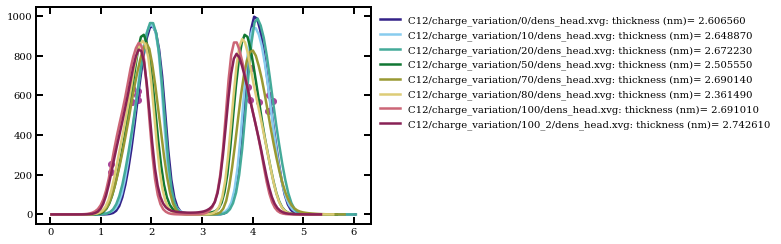

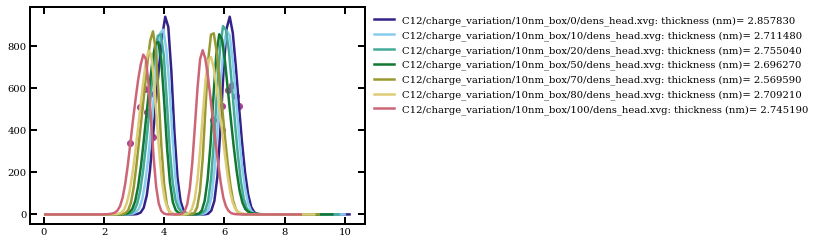

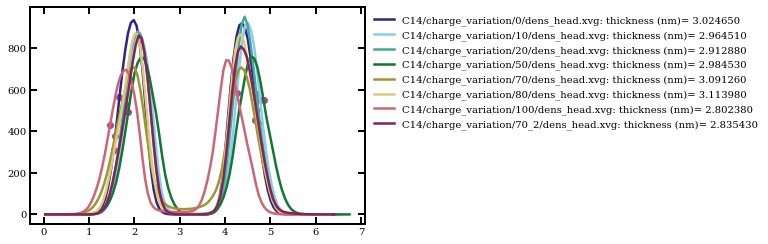

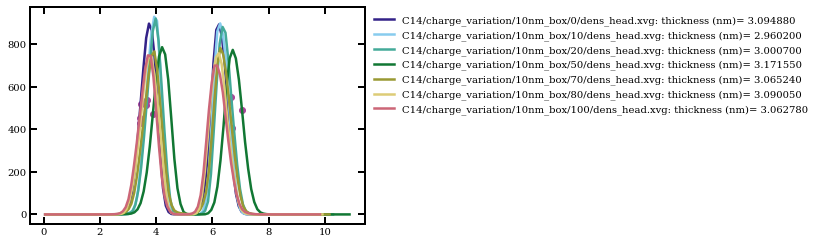

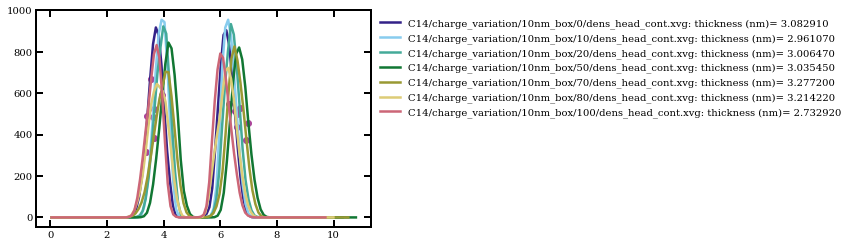

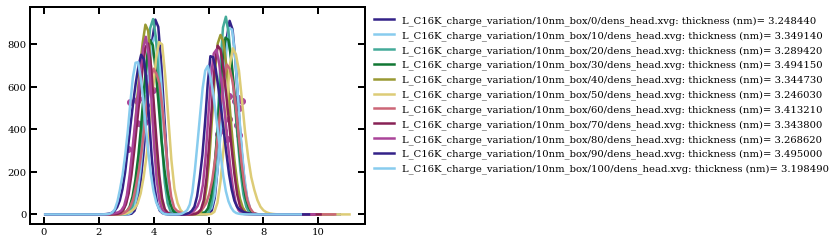

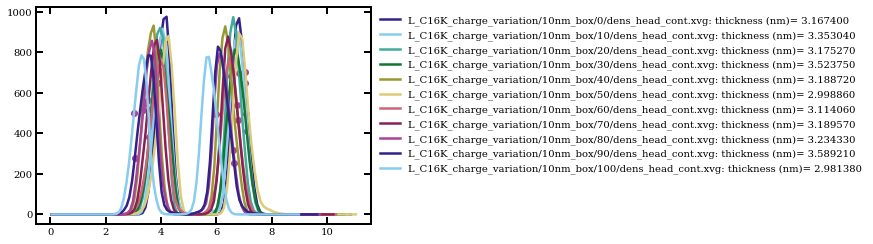

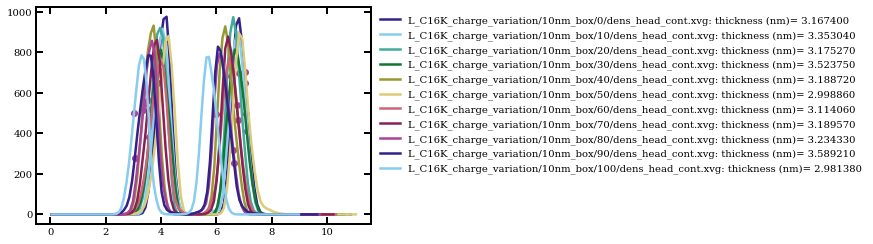

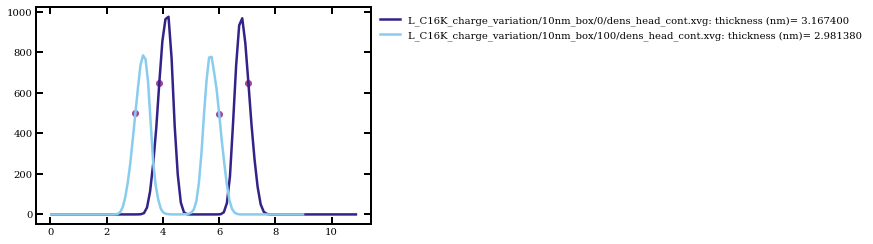

In [4]:
# Plotting headgroup densities C12
text_rows=24
group = "head"
columns = ["z","density"]
charge=["0","10","20","50","70","80","100","100_2"]
dfs = []
file_names=[]
for c in charge:
    file = "C12/charge_variation/"+c+"/dens_"+group+".xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
for file in file_names:
    df = res[file]
    x=df['z'].values
    y=df['density'].values
    first=find_peaks(derivative(x,y),height=400)[0][0]
    second=find_peaks(derivative(x,-y),height=400)[0][1]
    peak_index=[first,second]
    for index in peak_index:
        plt.scatter(x[index],y[index],color="#AA4499")
    height = df['z'][peak_index[1]]-df['z'][peak_index[0]]
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file+": thickness (nm)= %f"%height)
plt.legend(bbox_to_anchor =(1, 1))

# Plotting headgroup densities C12 10nm_box
text_rows=24
group = "head"
columns = ["z","density"]
charge=["0","10","20","50","70","80","100"]
dfs = []
file_names=[]
for c in charge:
    file = "C12/charge_variation/10nm_box/"+c+"/dens_"+group+".xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
heights_12=[]
for file in file_names:
    df = res[file]
    x=df['z'].values
    y=df['density'].values
    first=find_peaks(derivative(x,y),height=400)[0][0]
    second=find_peaks(derivative(x,-y),height=400)[0][1]
    peak_index=[first,second]
    for index in peak_index:
        plt.scatter(x[index],y[index],color="#AA4499")
    height = df['z'][peak_index[1]]-df['z'][peak_index[0]]
    heights_12.append(height)
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file+": thickness (nm)= %f"%height)
plt.legend(bbox_to_anchor =(1, 1))



# Plotting headgroup densities C14
text_rows=24
group = "head"
columns = ["z","density"]
charge=["0","10","20","50","70","80","100","70_2"]
dfs = []
file_names=[]
for c in charge:
    file = "C14/charge_variation/"+c+"/dens_"+group+".xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

plt.figure()
res = {file_names[i]: dfs[i] for i in range(len(dfs))}
for file in file_names:
    df = res[file]
    x=df['z'].values
    y=df['density'].values
    first=find_peaks(derivative(x,y),height=400)[0][0]
    second=find_peaks(derivative(x,-y),height=400)[0][1]
    peak_index=[first,second]
    for index in peak_index:
        plt.scatter(x[index],y[index],color="#AA4499")
    height = df['z'][peak_index[1]]-df['z'][peak_index[0]]
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file+": thickness (nm)= %f"%height)
plt.legend(bbox_to_anchor =(1, 1))


# Plotting headgroup densities C14
text_rows=24
group = "head"
columns = ["z","density"]
charge=["0","10","20","50","70","80","100"]
dfs = []
file_names=[]
for c in charge:
    file = "C14/charge_variation/10nm_box/"+c+"/dens_"+group+".xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

plt.figure()
res = {file_names[i]: dfs[i] for i in range(len(dfs))}
heights_14=[]
for file in file_names:
    df = res[file]
    x=df['z'].values
    y=df['density'].values
    first=find_peaks(derivative(x,y),height=400)[0][0]
    second=find_peaks(derivative(x,-y),height=400)[0][1]
    peak_index=[first,second]
    for index in peak_index:
        plt.scatter(x[index],y[index],color="#AA4499")
    height = df['z'][peak_index[1]]-df['z'][peak_index[0]]
    heights_14.append(height)
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file+": thickness (nm)= %f"%height)
plt.legend(bbox_to_anchor =(1, 1))

# Plotting headgroup densities C14 10nm box cont
text_rows=24
group = "head"
columns = ["z","density"]
charge=["0","10","20","50","70","80","100"]
dfs = []
file_names=[]
for c in charge:
    file = "C14/charge_variation/10nm_box/"+c+"/dens_"+group+"_cont.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

plt.figure()
res = {file_names[i]: dfs[i] for i in range(len(dfs))}
heights_14=[]
for file in file_names:
    df = res[file]
    x=df['z'].values
    y=df['density'].values
    first=find_peaks(derivative(x,y),height=400)[0][0]
    second=find_peaks(derivative(x,-y),height=400)[0][1]
    peak_index=[first,second]
    for index in peak_index:
        plt.scatter(x[index],y[index],color="#AA4499")
    height = df['z'][peak_index[1]]-df['z'][peak_index[0]]
    heights_14.append(height)
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file+": thickness (nm)= %f"%height)
plt.legend(bbox_to_anchor =(1, 1))

# Plotting headgroup densities C16 10nm_box
text_rows=24
group = "head"
columns = ["z","density"]
charge=["0","10","20","30","40","50","60","70","80","90","100"]
dfs = []
file_names=[]
for c in charge:
    file = "L_C16K_charge_variation/10nm_box/"+c+"/dens_"+group+".xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
heights_16=[]
for file in file_names:
    df = res[file]
    x=df['z'].values
    y=df['density'].values
    first=find_peaks(derivative(x,y),height=400)[0][0]
    second=find_peaks(derivative(x,-y),height=400)[0][1]
    peak_index=[first,second]
    for index in peak_index:
        plt.scatter(x[index],y[index],color="#AA4499")
    height = df['z'][peak_index[1]]-df['z'][peak_index[0]]
    heights_16.append(height)
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file+": thickness (nm)= %f"%height)
plt.legend(bbox_to_anchor =(1, 1))


# Plotting headgroup densities C16 10nm_box cont
text_rows=24
group = "head"
columns = ["z","density"]
charge=["0","10","20","30","40","50","60","70","80","90","100"]
dfs = []
file_names=[]
for c in charge:
    file = "L_C16K_charge_variation/10nm_box/"+c+"/dens_"+group+"_cont.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
heights=[]
for file in file_names:
    df = res[file]
    x=df['z'].values
    y=df['density'].values
    first=find_peaks(derivative(x,y),height=400)[0][0]
    second=find_peaks(derivative(x,-y),height=400)[0][1]
    peak_index=[first,second]
    for index in peak_index:
        plt.scatter(x[index],y[index],color="#AA4499")
    height = df['z'][peak_index[1]]-df['z'][peak_index[0]]
    heights.append(height)
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file+": thickness (nm)= %f"%height)
plt.legend(bbox_to_anchor =(1, 1))


# Plotting headgroup densities C16 10nm_box cont
text_rows=24
group = "head"
columns = ["z","density"]
charge=["0","10","20","30","40","50","60","70","80","90","100"]
dfs = []
file_names=[]
for c in charge:
    file = "L_C16K_charge_variation/10nm_box/"+c+"/dens_"+group+"_cont.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
heights=[]
for file in file_names:
    df = res[file]
    x=df['z'].values
    y=df['density'].values
    first=find_peaks(derivative(x,y),height=400)[0][0]
    second=find_peaks(derivative(x,-y),height=400)[0][1]
    peak_index=[first,second]
    for index in peak_index:
        plt.scatter(x[index],y[index],color="#AA4499")
    height = df['z'][peak_index[1]]-df['z'][peak_index[0]]
    heights.append(height)
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file+": thickness (nm)= %f"%height)
plt.legend(bbox_to_anchor =(1, 1))


# Plotting headgroup densities C16 10nm_box cont
text_rows=24
group = "head"
columns = ["z","density"]
#charge=["0","10","20","30","40","50","60","70","80","90","100"]
charge=["0","100"]
dfs = []
file_names=[]
for c in charge:
    file = "L_C16K_charge_variation/10nm_box/"+c+"/dens_"+group+"_cont.xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
heights=[]
for file in file_names:
    df = res[file]
    x=df['z'].values
    y=df['density'].values
    first=find_peaks(derivative(x,y),height=400)[0][0]
    second=find_peaks(derivative(x,-y),height=400)[0][1]
    peak_index=[first,second]
    for index in peak_index:
        plt.scatter(x[index],y[index],color="#AA4499")
    height = df['z'][peak_index[1]]-df['z'][peak_index[0]]
    heights.append(height)
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file+": thickness (nm)= %f"%height)
plt.legend(bbox_to_anchor =(1, 1))



    




In [9]:
def find_greater_than_n(x,n):
    for element in x:
        if element<=n:
            continue
        else:
            #return element
            return x.index(element)
            break
            
def find_less_than_n(x,n):
    for element in x:
        if element>=n:
            continue
        else:
            #return element
            return x.index(element)
            break
            
j = find_greater_than_n(list(dfs[0]['density'].values),300)
k = find_greater_than_n(list(dfs[0]['density'].values),200)

print(j,k)

KeyError: 'density'

In [ ]:
x = dfs[0]['z'].values
y = dfs[0]['density'].values
plt.plot(x,derivative(x,y))
plt.plot(x,derivative(x,derivative(x,y)))

first=find_peaks(derivative(x,y),height=400)[0][0]
second=find_peaks(derivative(x,-y),height=400)[0][1]
peak_index=[first,second]
for index in peak_index:
    plt.scatter(x[index],derivative(x,y)[index],color="#AA4499")
    print(derivative(x,y)[index])
    

In [ ]:

x = dfs[0]['z'].values
y = dfs[0]['density'].values

f0=interp1d(x,y)
f1=interp1d(x,derivative(x,y),"cubic")
f2=interp1d(x,derivative(x,derivative(x,y)),"cubic")
plt.plot(x,f0(x))
#plt.plot(x,f2(x))
first=find_peaks(f2(x),height=200)[0][0]
second=find_peaks(f2(x[::-1]),height=200)[0][0]
peak_index=[first,len(x)-second-1]
for index in peak_index:
    plt.scatter(x[index],f0(x)[index],color="#AA4499")
    print(f2(x)[index])

Text(0.5, 1.0, 'C$_{12}$K$_{1}$')

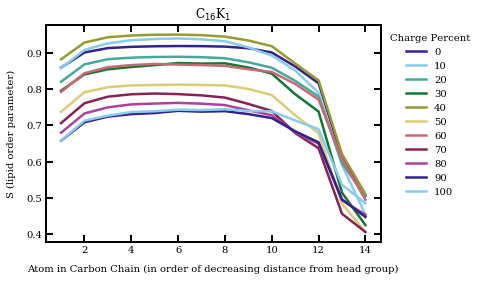

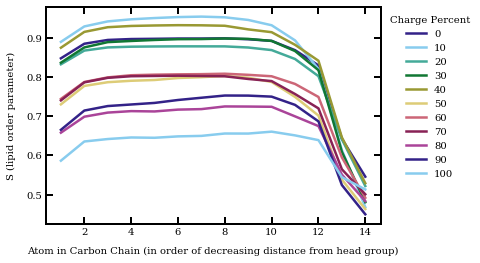

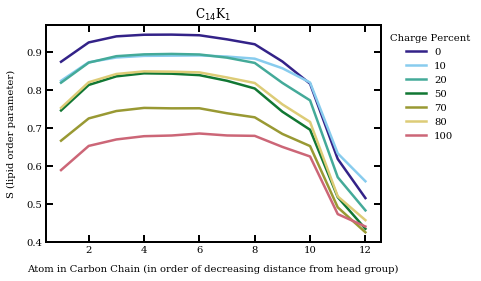

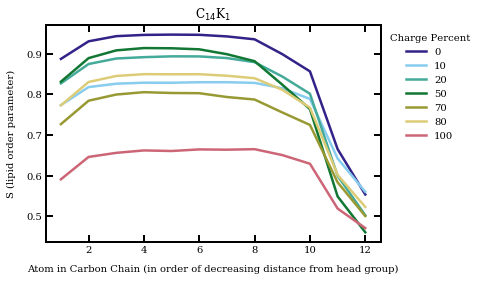

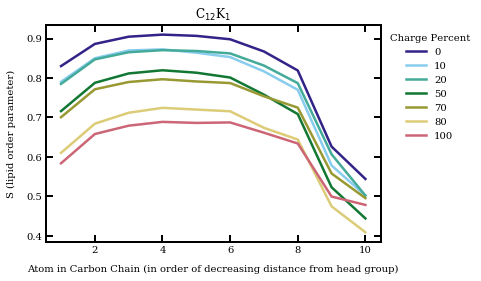

In [5]:
#c16 order.xvg 10nm box
text_rows=17
columns=["atom","Sxx","Syy","Szz"]
charge=["0","10","20","30","40","50","60","70","80","90","100"]
dfs_S_16 = []
file_names=[]
for c in charge:
    file = "L_C16K_charge_variation/10nm_box/"+c+"/order.xvg"
    file_names.append(file)
    dfs_S_16.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs_S_16[i] for i in range(len(dfs_S_16))}
plt.figure()
i=0
for file in file_names:
    df = res[file]
    #plt.plot(df[df.columns[0]],df[df.columns[3]],label=file)
    plt.plot(df[df.columns[0]],df[df.columns[3]],label=charge[i])
    i+=1
plt.legend(bbox_to_anchor =(1, 1),title='Charge Percent')
plt.title("C$_{16}$K$_1$")
plt.ylabel('S (lipid order parameter)')
plt.xlabel('Atom in Carbon Chain (in order of decreasing distance from head group)')


#c16 order.xvg 10nm box cont
text_rows=17
columns=["atom","Sxx","Syy","Szz"]
charge=["0","10","20","30","40","50","60","70","80","90","100"]
dfs_S = []
file_names=[]
for c in charge:
    file = "L_C16K_charge_variation/10nm_box/"+c+"/order_cont.xvg"
    file_names.append(file)
    dfs_S.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs_S[i] for i in range(len(dfs_S))}
plt.figure()
i=0
for file in file_names:
    df = res[file]
    #plt.plot(df[df.columns[0]],df[df.columns[3]],label=file)
    plt.plot(df[df.columns[0]],df[df.columns[3]],label=charge[i])
    i+=1
plt.legend(bbox_to_anchor =(1, 1),title="Charge Percent")
plt.ylabel('S (lipid order parameter)')
plt.xlabel('Atom in Carbon Chain (in order of decreasing distance from head group)')

#c14 order.xvg 10nm box
text_rows=17
columns=["atom","Sxx","Syy","Szz"]
charge=["0","10","20","50","70","80","100"]
dfs_S_14 = []
file_names=[]
for c in charge:
    file = "C14/charge_variation/10nm_box/"+c+"/order.xvg"
    file_names.append(file)
    dfs_S_14.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    
res = {file_names[i]: dfs_S_14[i] for i in range(len(dfs_S_14))}
plt.figure()
i=0
for file in file_names:
    df = res[file]
    #plt.plot(df[df.columns[0]],df[df.columns[3]],label=file)
    plt.plot(df[df.columns[0]],df[df.columns[3]],label=charge[i])
    i+=1
plt.legend(bbox_to_anchor =(1, 1),title="Charge Percent")
plt.title("C$_{14}$K$_1$")
plt.ylabel('S (lipid order parameter)')
plt.xlabel('Atom in Carbon Chain (in order of decreasing distance from head group)')


#c14 order.xvg 10nm box
text_rows=17
columns=["atom","Sxx","Syy","Szz"]
charge=["0","10","20","50","70","80","100"]
dfs_S_14 = []
file_names=[]
for c in charge:
    file = "C14/charge_variation/10nm_box/"+c+"/order_cont.xvg"
    file_names.append(file)
    dfs_S_14.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    
res = {file_names[i]: dfs_S_14[i] for i in range(len(dfs_S_14))}
plt.figure()
i=0
for file in file_names:
    df = res[file]
    #plt.plot(df[df.columns[0]],df[df.columns[3]],label=file)
    plt.plot(df[df.columns[0]],df[df.columns[3]],label=charge[i])
    i+=1
plt.legend(bbox_to_anchor =(1, 1),title="Charge Percent")
plt.title("C$_{14}$K$_1$")
plt.ylabel('S (lipid order parameter)')
plt.xlabel('Atom in Carbon Chain (in order of decreasing distance from head group)')




#c12 order.xvg 10nm box
text_rows=17
columns=["atom","Sxx","Syy","Szz"]
charge=["0","10","20","50","70","80","100"]
dfs_S_12 = []
file_names=[]
for c in charge:
    file = "C12/charge_variation/10nm_box/"+c+"/order.xvg"
    file_names.append(file)
    dfs_S_12.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs_S_12[i] for i in range(len(dfs_S_12))}
plt.figure()
i=0
for file in file_names:
    df = res[file]
    #plt.plot(df[df.columns[0]],df[df.columns[3]],label=file)
    plt.plot(df[df.columns[0]],df[df.columns[3]],label=charge[i])
    i+=1
plt.legend(bbox_to_anchor =(1, 1),title='Charge Percent')
plt.ylabel('S (lipid order parameter)')
plt.xlabel('Atom in Carbon Chain (in order of decreasing distance from head group)')
plt.title('C$_{12}$K$_{1}$')




In [7]:
def func(x,b):
    return b

def func2(x,a,b):
    return a*x + b

In [8]:
charge=["0","10","20","30","40","50","60","70","80","90","100"]
charge_list=[]
for c in charge:
    charge_list.append(int(c))
    
apl_fit_list = []  
for df in dfs_apl:
    popt,pcov=curve_fit(func,df[df.columns[0]],df[df.columns[1]])
    apl_fit_list.append(popt[0])
    
S_fit_list = []  
for df in dfs_S:
    popt,pcov=curve_fit(func,df[df.columns[0]][1:12],df[df.columns[3]][1:12])
    S_fit_list.append(popt[0])

theta = [np.arccos((2*s+1)/3) for s in S_fit_list]
theta_deg = [(180/np.pi)*th for th in theta]

df = pd.DataFrame(list(zip(charge_list,apl_fit_list,heights,S_fit_list,theta,theta_deg)),columns=["charge","APL","D","S","theta","theta(deg)"])
trend_params=[]
for y in [apl_fit_list,S_fit_list,theta_deg,heights]:
    popt2,pcov2=curve_fit(func2,charge_list,y)
    trend_params.append(popt2)

plt.figure()
plt.scatter(charge_list,apl_fit_list)
plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[0][0],trend_params[0][1]))
plt.xlabel('Charge Percent')
plt.ylabel('APL ($\AA^2$/lipid)')
plt.figure()
plt.scatter(charge_list,S_fit_list)
plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[1][0],trend_params[1][1]))
plt.xlabel('Charge Percent')
plt.ylabel('S (average)')
plt.figure()
plt.scatter(charge_list,theta_deg)
plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[2][0],trend_params[2][1]))
plt.xlabel('Charge Percent')
plt.ylabel('Average Tilt Angle (deg)')
plt.figure()
plt.scatter(charge_list,heights)
plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[3][0],trend_params[3][1]))
plt.xlabel('Charge Percent')
plt.ylabel('Bilayer Thickness (nm)')

ValueError: operands could not be broadcast together with shapes (11,) (2,) 

Text(0, 0.5, 'Bilayer Thickness (nm)')

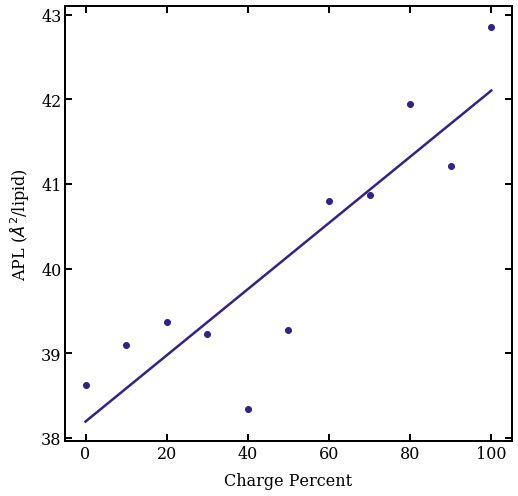

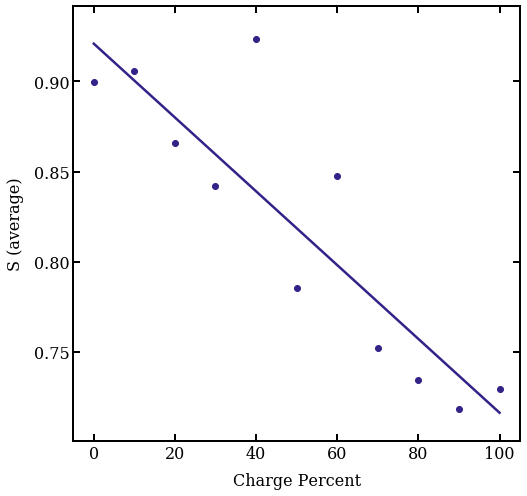

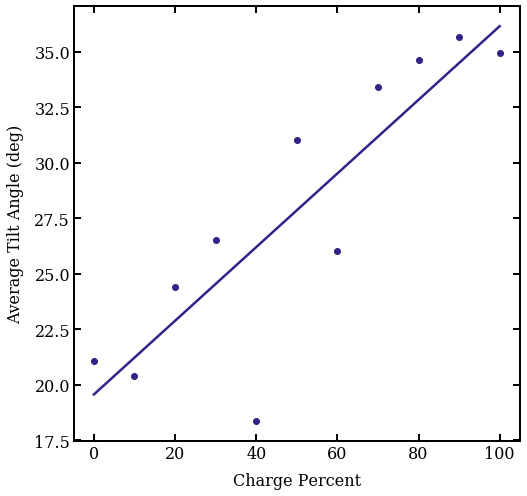

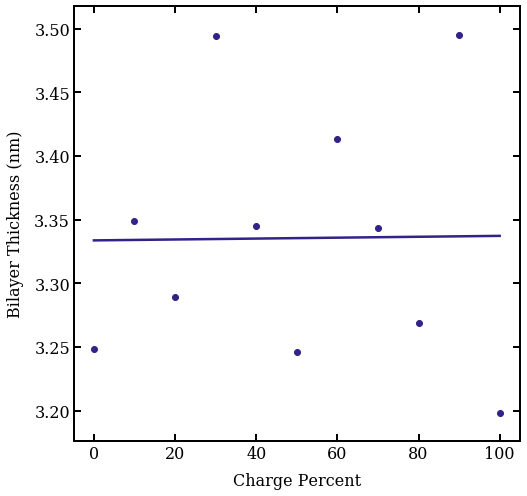

In [27]:
charge=["0","10","20","30","40","50","60","70","80","90","100"]
charge_list=[]
for c in charge:
    charge_list.append(int(c))
    
apl_fit_list = []  
for df in dfs_apl_16:
    popt,pcov=curve_fit(func,df[df.columns[0]],df[df.columns[1]])
    apl_fit_list.append(popt[0])
    
S_fit_list = []  
for df in dfs_S_16:
    popt,pcov=curve_fit(func,df[df.columns[0]][1:12],df[df.columns[3]][1:12])
    S_fit_list.append(popt[0])

theta = [np.arccos((2*s+1)/3) for s in S_fit_list]
theta_deg = [(180/np.pi)*th for th in theta]

df = pd.DataFrame(list(zip(charge_list,apl_fit_list,heights,S_fit_list,theta,theta_deg)),columns=["charge","APL","D","S","theta","theta(deg)"])
trend_params=[]
for y in [apl_fit_list,S_fit_list,theta_deg,heights_16]:
    popt2,pcov2=curve_fit(func2,charge_list,y)
    trend_params.append(popt2)


plt.figure()
plt.scatter(charge_list,apl_fit_list)
plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[0][0],trend_params[0][1]))
plt.xlabel('Charge Percent')
plt.ylabel('APL ($\AA^2$/lipid)')
plt.figure()
plt.scatter(charge_list,S_fit_list)
plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[1][0],trend_params[1][1]))
plt.xlabel('Charge Percent')
plt.ylabel('S (average)')
plt.figure()
plt.scatter(charge_list,theta_deg)
plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[2][0],trend_params[2][1]))
plt.xlabel('Charge Percent')
plt.ylabel('Average Tilt Angle (deg)')
plt.figure()
plt.scatter(charge_list,heights_16)
plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[3][0],trend_params[3][1]))
plt.xlabel('Charge Percent')
plt.ylabel('Bilayer Thickness (nm)')

Text(0, 0.5, 'Bilayer Thickness (nm)')

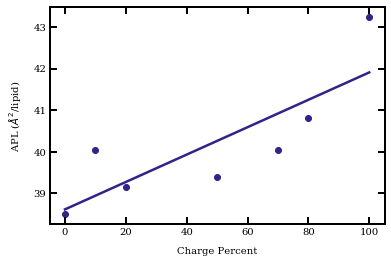

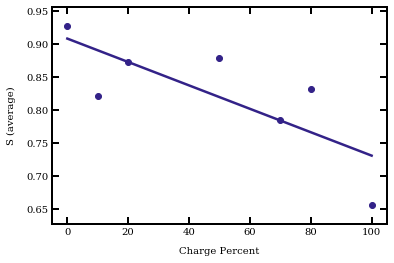

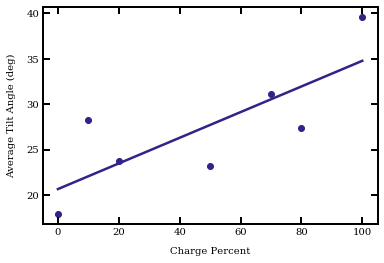

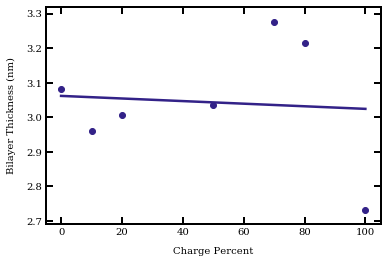

In [9]:
charge=["0","10","20","50","70","80","100"]
charge_list=[]
for c in charge:
    charge_list.append(int(c))
    
apl_fit_list = []  
for df in dfs_apl_14:
    popt,pcov=curve_fit(func,df[df.columns[0]],df[df.columns[1]])
    apl_fit_list.append(popt[0])
    
S_fit_list = []  
for df in dfs_S_14:
    popt,pcov=curve_fit(func,df[df.columns[0]][1:10],df[df.columns[3]][1:10])
    S_fit_list.append(popt[0])

theta = [np.arccos((2*s+1)/3) for s in S_fit_list]
theta_deg = [(180/np.pi)*th for th in theta]

df = pd.DataFrame(list(zip(charge_list,apl_fit_list,heights,S_fit_list,theta,theta_deg)),columns=["charge","APL","D","S","theta","theta(deg)"])
trend_params=[]
for y in [apl_fit_list,S_fit_list,theta_deg,heights_14]:
    popt2,pcov2=curve_fit(func2,charge_list,y)
    trend_params.append(popt2)


plt.figure()
plt.scatter(charge_list,apl_fit_list)
plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[0][0],trend_params[0][1]))
plt.xlabel('Charge Percent')
plt.ylabel('APL ($\AA^2$/lipid)')
plt.figure()
plt.scatter(charge_list,S_fit_list)
plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[1][0],trend_params[1][1]))
plt.xlabel('Charge Percent')
plt.ylabel('S (average)')
plt.figure()
plt.scatter(charge_list,theta_deg)
plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[2][0],trend_params[2][1]))
plt.xlabel('Charge Percent')
plt.ylabel('Average Tilt Angle (deg)')
plt.figure()
plt.scatter(charge_list,heights_14)
plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[3][0],trend_params[3][1]))
plt.xlabel('Charge Percent')
plt.ylabel('Bilayer Thickness (nm)')

Text(0, 0.5, 'Bilayer Thickness (nm)')

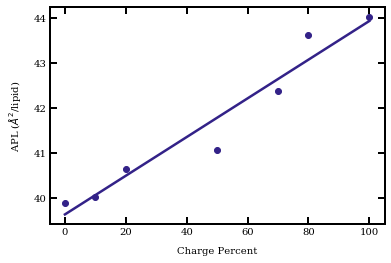

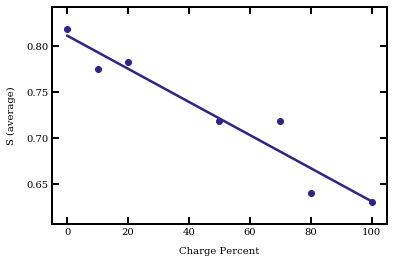

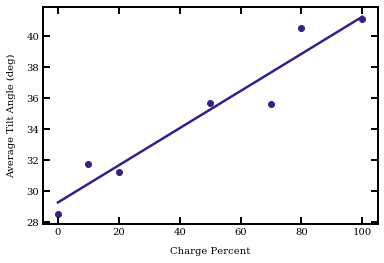

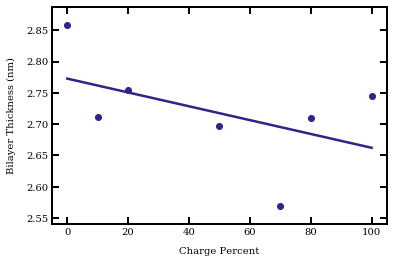

In [10]:
charge=["0","10","20","50","70","80","100"]
charge_list=[]
for c in charge:
    charge_list.append(int(c))
    
apl_fit_list = []  
for df in dfs_apl_12:
    popt,pcov=curve_fit(func,df[df.columns[0]],df[df.columns[1]])
    apl_fit_list.append(popt[0])
    
S_fit_list = []  
for df in dfs_S_12:
    popt,pcov=curve_fit(func,df[df.columns[0]][1:10],df[df.columns[3]][1:10])
    S_fit_list.append(popt[0])

theta = [np.arccos((2*s+1)/3) for s in S_fit_list]
theta_deg = [(180/np.pi)*th for th in theta]

df = pd.DataFrame(list(zip(charge_list,apl_fit_list,heights,S_fit_list,theta,theta_deg)),columns=["charge","APL","D","S","theta","theta(deg)"])
trend_params=[]
for y in [apl_fit_list,S_fit_list,theta_deg,heights_12]:
    popt2,pcov2=curve_fit(func2,charge_list,y)
    trend_params.append(popt2)


plt.figure()
plt.scatter(charge_list,apl_fit_list)
plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[0][0],trend_params[0][1]))
plt.xlabel('Charge Percent')
plt.ylabel('APL ($\AA^2$/lipid)')
plt.figure()
plt.scatter(charge_list,S_fit_list)
plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[1][0],trend_params[1][1]))
plt.xlabel('Charge Percent')
plt.ylabel('S (average)')
plt.figure()
plt.scatter(charge_list,theta_deg)
plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[2][0],trend_params[2][1]))
plt.xlabel('Charge Percent')
plt.ylabel('Average Tilt Angle (deg)')
plt.figure()
plt.scatter(charge_list,heights_12)
plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[3][0],trend_params[3][1]))
plt.xlabel('Charge Percent')
plt.ylabel('Bilayer Thickness (nm)')

In [20]:
apl_fit_list
S_fit_list

[0.886782090908844,
 0.9289684545452996,
 0.8658339999997073,
 0.8831634545451996,
 0.9143226363634493,
 0.7802076363631569,
 0.796157272726828,
 0.7870410909086263,
 0.7105152727266412,
 0.7330079090909091,
 0.6480191818174139]

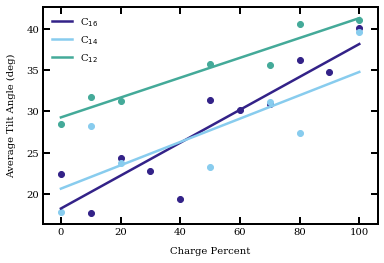

In [11]:
charge=["0","10","20","30","40","50","60","70","80","90","100"]
charge_list=[]
for c in charge:
    charge_list.append(int(c))
    
apl_fit_list = []  
#for df in dfs_apl_16:
for df in dfs_apl:
    popt,pcov=curve_fit(func,df[df.columns[0]],df[df.columns[1]])
    apl_fit_list.append(popt[0])
    
S_fit_list = []  
#for df in dfs_S_16:
for df in dfs_S:
    popt,pcov=curve_fit(func,df[df.columns[0]][1:12],df[df.columns[3]][1:12])
    S_fit_list.append(popt[0])

theta = [np.arccos((2*s+1)/3) for s in S_fit_list]
theta_deg = [(180/np.pi)*th for th in theta]

df = pd.DataFrame(list(zip(charge_list,apl_fit_list,heights,S_fit_list,theta,theta_deg)),columns=["charge","APL","D","S","theta","theta(deg)"])
trend_params=[]
for y in [apl_fit_list,S_fit_list,theta_deg,heights_16]:
    popt2,pcov2=curve_fit(func2,charge_list,y)
    trend_params.append(popt2)
plt.scatter(charge_list,theta_deg)
plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[2][0],trend_params[2][1]),label="C$_{16}$")
plt.xlabel('Charge Percent')
plt.ylabel('Average Tilt Angle (deg)')   
    
    

charge=["0","10","20","50","70","80","100"]
charge_list=[]
for c in charge:
    charge_list.append(int(c))
    
apl_fit_list = []  
for df in dfs_apl_14:
    popt,pcov=curve_fit(func,df[df.columns[0]],df[df.columns[1]])
    apl_fit_list.append(popt[0])
    
S_fit_list = []  
for df in dfs_S_14:
    popt,pcov=curve_fit(func,df[df.columns[0]][1:10],df[df.columns[3]][1:10])
    S_fit_list.append(popt[0])

theta = [np.arccos((2*s+1)/3) for s in S_fit_list]
theta_deg = [(180/np.pi)*th for th in theta]

df = pd.DataFrame(list(zip(charge_list,apl_fit_list,heights,S_fit_list,theta,theta_deg)),columns=["charge","APL","D","S","theta","theta(deg)"])
trend_params=[]
for y in [apl_fit_list,S_fit_list,theta_deg,heights_14]:
    popt2,pcov2=curve_fit(func2,charge_list,y)
    trend_params.append(popt2)
plt.scatter(charge_list,theta_deg)
plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[2][0],trend_params[2][1]),label="C$_{14}$")
plt.xlabel('Charge Percent')
plt.ylabel('Average Tilt Angle (deg)')
    
    

charge=["0","10","20","50","70","80","100"]
charge_list=[]
for c in charge:
    charge_list.append(int(c))
    
apl_fit_list = []  
for df in dfs_apl_12:
    popt,pcov=curve_fit(func,df[df.columns[0]],df[df.columns[1]])
    apl_fit_list.append(popt[0])
    
S_fit_list = []  
for df in dfs_S_12:
    popt,pcov=curve_fit(func,df[df.columns[0]][1:10],df[df.columns[3]][1:10])
    S_fit_list.append(popt[0])

theta = [np.arccos((2*s+1)/3) for s in S_fit_list]
theta_deg = [(180/np.pi)*th for th in theta]

df = pd.DataFrame(list(zip(charge_list,apl_fit_list,heights,S_fit_list,theta,theta_deg)),columns=["charge","APL","D","S","theta","theta(deg)"])
trend_params=[]
for y in [apl_fit_list,S_fit_list,theta_deg,heights_12]:
    popt2,pcov2=curve_fit(func2,charge_list,y)
    trend_params.append(popt2)
plt.scatter(charge_list,theta_deg)
plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[2][0],trend_params[2][1]),label="C$_{12}$")
plt.xlabel('Charge Percent')
plt.ylabel('Average Tilt Angle (deg)')
plt.legend()

# --------------------------------------------------------------------------------------
# --------------------------------------------------------------------------------------
# --------------------------------------------------------------------------------------
# --------------------------------------------------------------------------------------

14
14
14
14
14
14
14
14
14
14
14


Text(0.5, 1.0, 'C$_{12}$K$_{1}$')

/home/joey/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


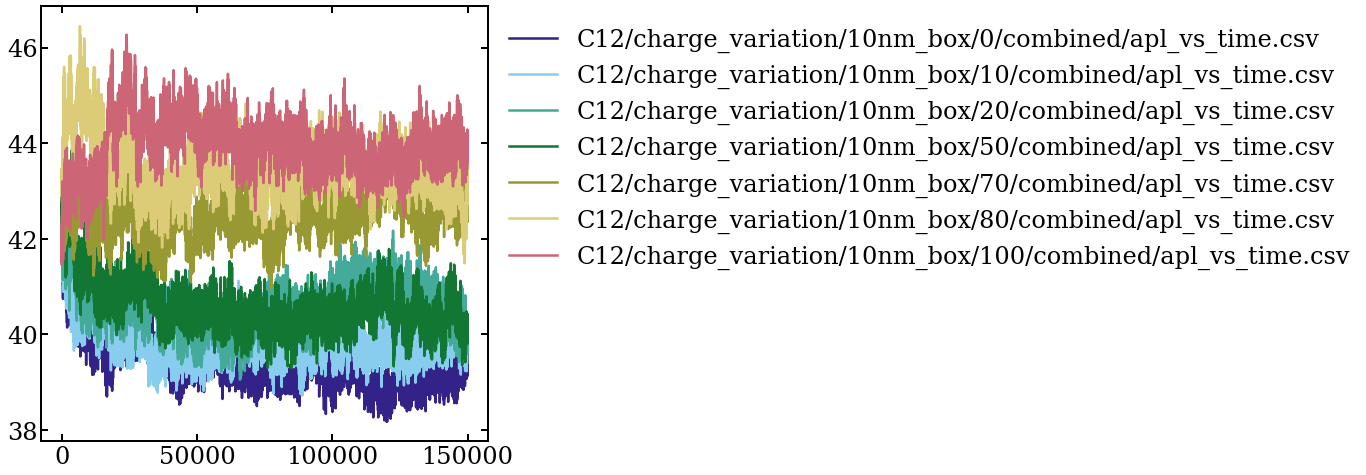

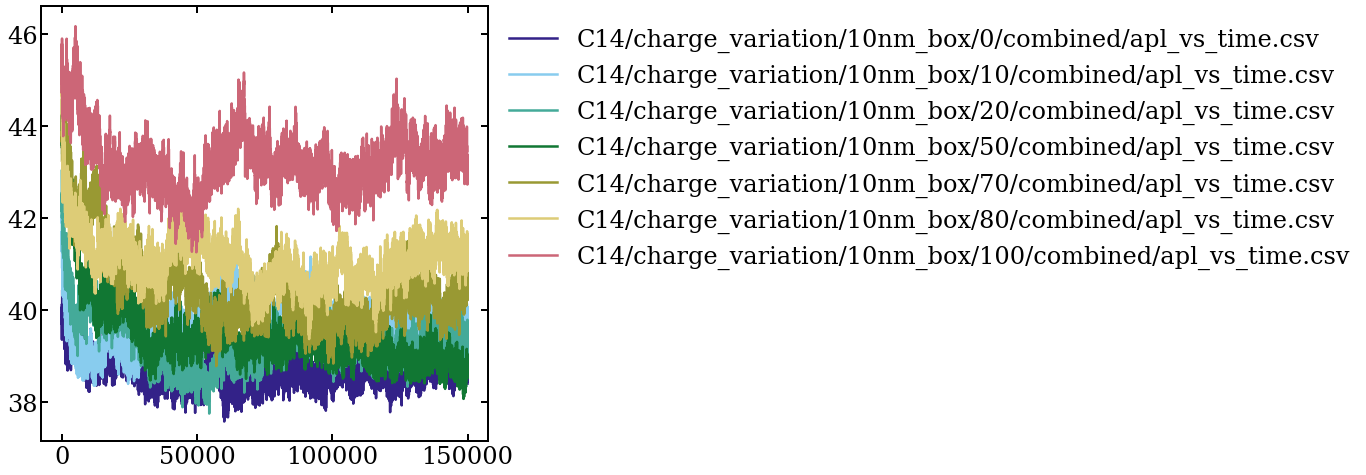

/home/joey/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


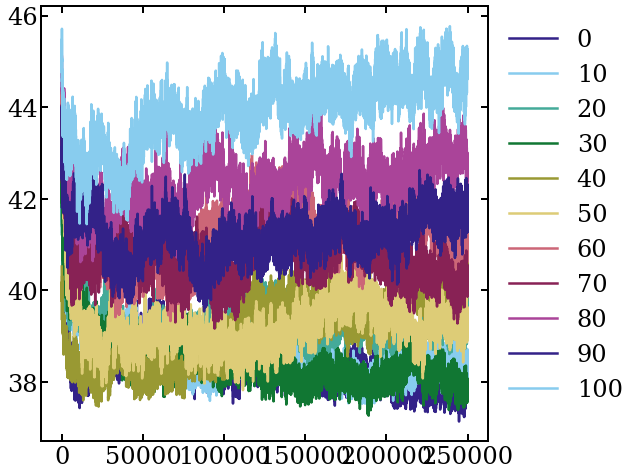

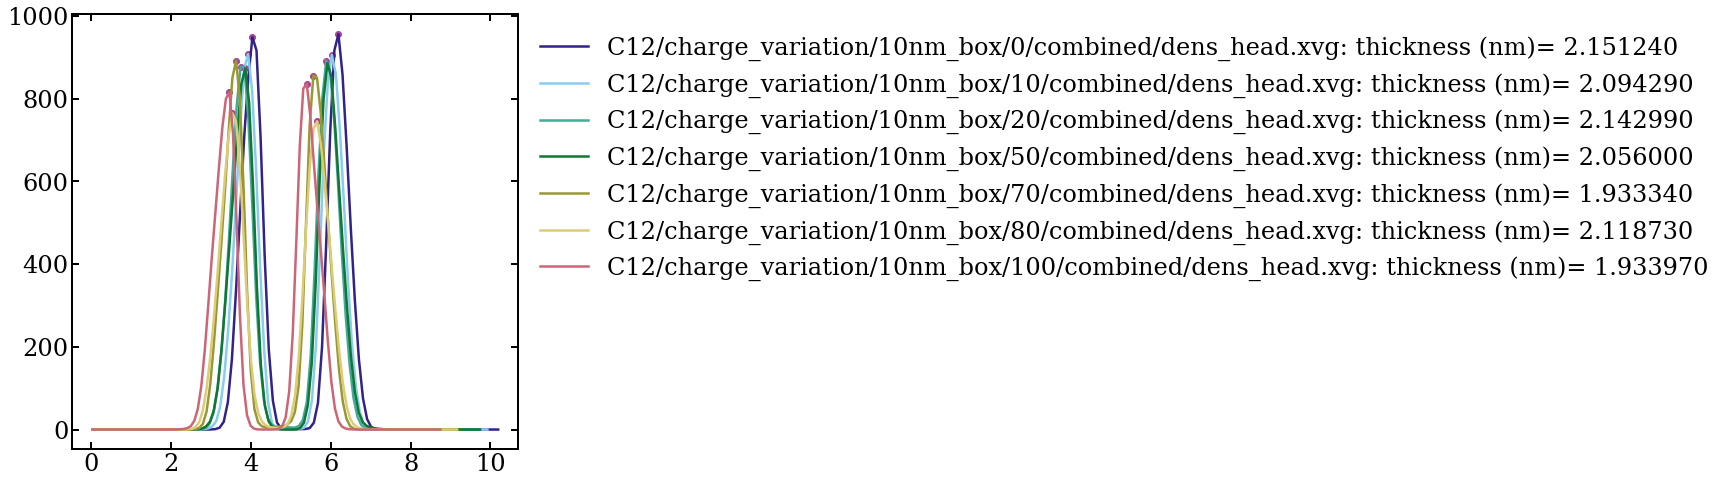

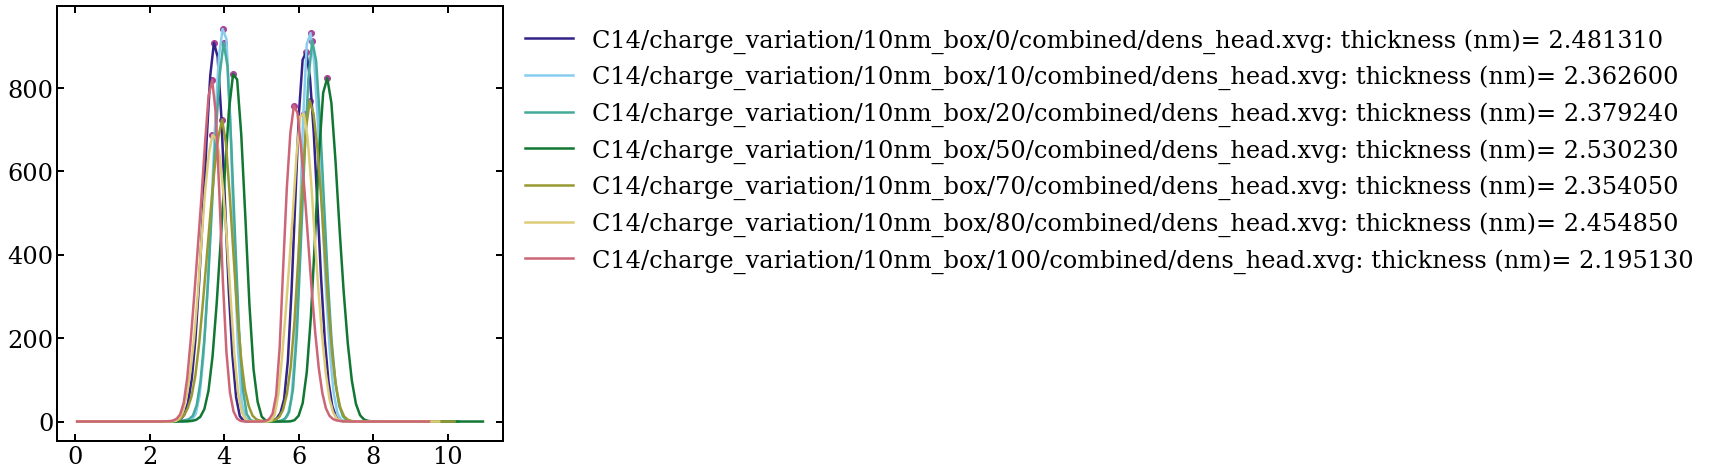

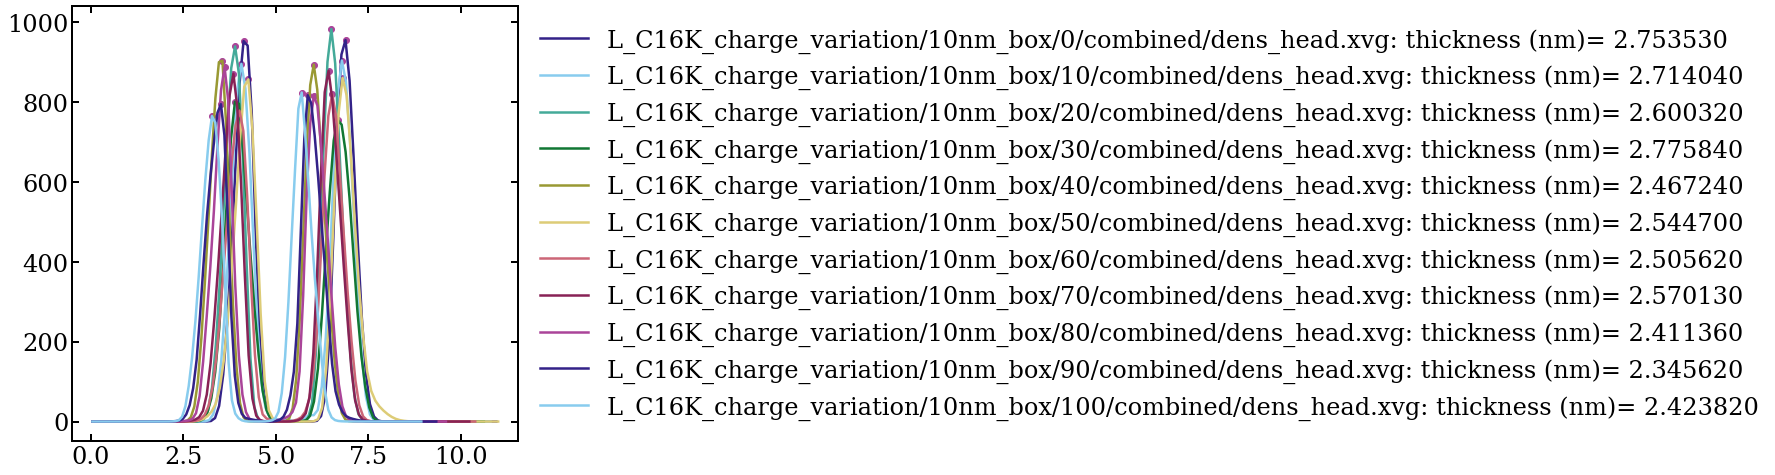

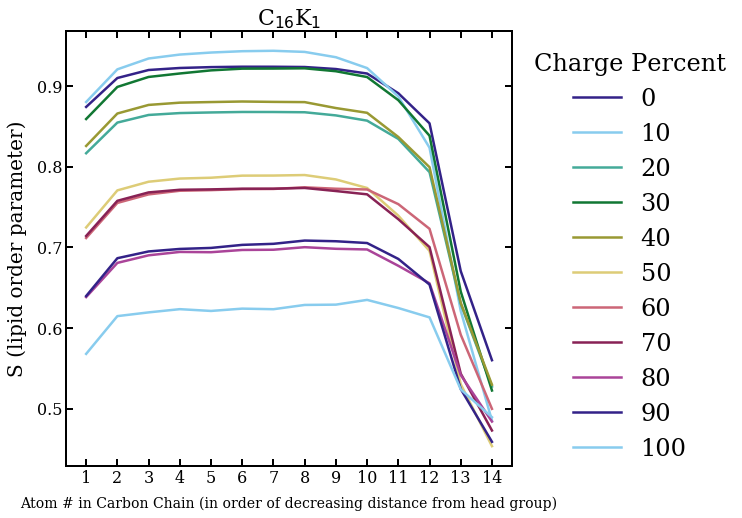

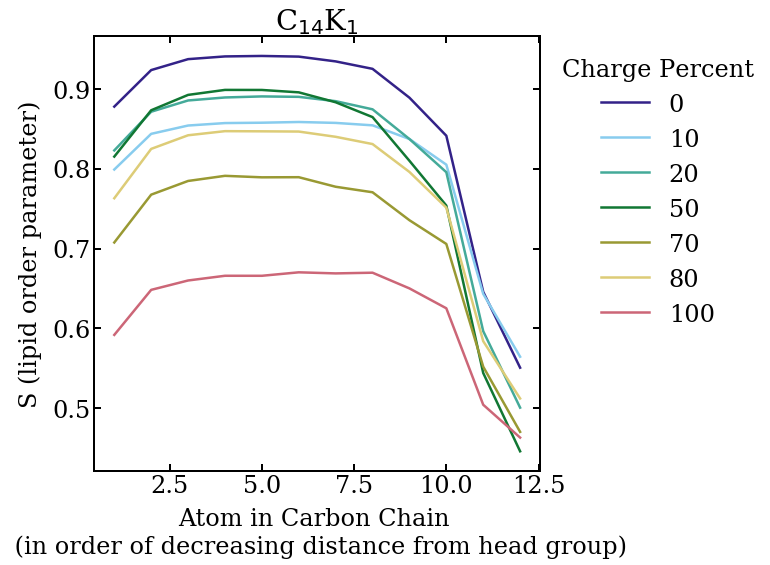

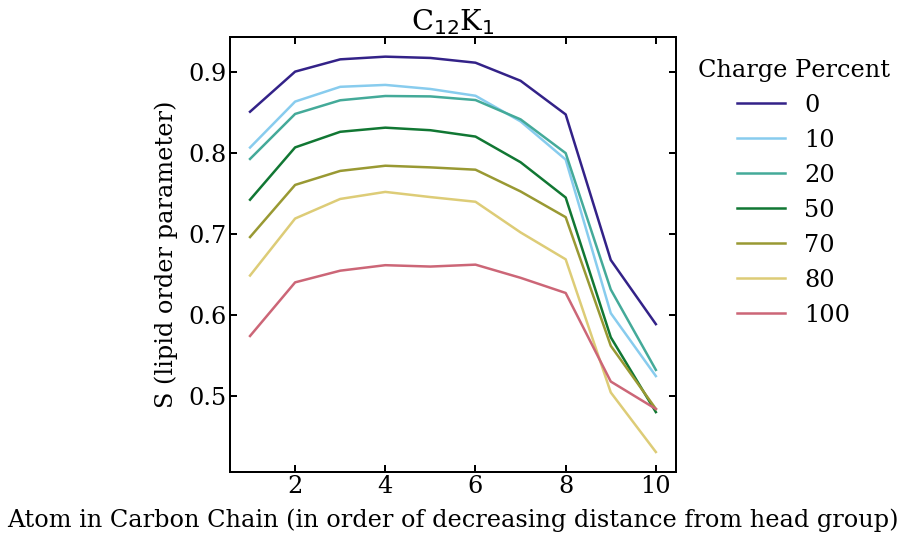

In [11]:
# Plotting C12 10nm_box apl vs time
columns = ["time","apl"]
charge=["0","10","20","50","70","80","100"]
dfs_apl_12 = []
file_names=[]
for c in charge:
    file = "C12/charge_variation/10nm_box/"+c+"/combined/apl_vs_time.csv"
    file_names.append(file)
    dfs_apl_12.append(pd.read_csv(basedir+file,header=1,names=columns))
    
res = {file_names[i]: dfs_apl_12[i] for i in range(len(dfs_apl_12))}
plt.figure()
for file in file_names:
    df = res[file]
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
plt.legend(bbox_to_anchor =(1, 1))


# Plotting C14 10nm box cont
columns = ["time","apl"]
charge=["0","10","20","50","70","80","100"]
dfs_apl_14 = []
file_names=[]
for c in charge:
    file = "C14/charge_variation/10nm_box/"+c+"/combined/apl_vs_time.csv"
    file_names.append(file)
    dfs_apl_14.append(pd.read_csv(basedir+file,header=1,names=columns))
    
res = {file_names[i]: dfs_apl_14[i] for i in range(len(dfs_apl_14))}
plt.figure()
for file in file_names:
    df = res[file]
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
plt.legend(bbox_to_anchor =(1, 1))

# Plotting C16
columns = ["time","apl"]
charge=["0","10","20","30","40","50","60","70","80","90","100"]
dfs_apl_16 = []
file_names=[]
labels = []
for c in charge:
    file = "L_C16K_charge_variation/10nm_box/"+c+"/combined/apl_vs_time.csv"
    file_names.append(file)
    labels.append(c)
    dfs_apl_16.append(pd.read_csv(basedir+file,header=1,names=columns))
    
res = {file_names[i]: dfs_apl_16[i] for i in range(len(dfs_apl_16))}
plt.figure()
for file in file_names:
    df = res[file]
    #plt.plot(df[df.columns[0]],df[df.columns[1]],label=file)
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=labels[file_names.index(file)])
plt.legend(bbox_to_anchor =(1, 1))








# Plotting headgroup densities C12 10nm_box
text_rows=24
group = "head"
columns = ["z","density"]
charge=["0","10","20","50","70","80","100"]
dfs = []
file_names=[]
for c in charge:
    file = "C12/charge_variation/10nm_box/"+c+"/combined/dens_"+group+".xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
heights_12=[]
for file in file_names:
    df = res[file]
    peak_index=find_peaks(df['density'],height=400)[0]
    for index in peak_index:
        plt.scatter(df['z'][index],df['density'][index],color="#AA4499")
    height = df['z'][peak_index[1]]-df['z'][peak_index[0]]
    heights_12.append(height)
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file+": thickness (nm)= %f"%height)
plt.legend(bbox_to_anchor =(1, 1))



# Plotting headgroup densities C14
text_rows=24
group = "head"
columns = ["z","density"]
charge=["0","10","20","50","70","80","100"]
dfs = []
file_names=[]
for c in charge:
    file = "C14/charge_variation/10nm_box/"+c+"/combined/dens_"+group+".xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

plt.figure()
res = {file_names[i]: dfs[i] for i in range(len(dfs))}
heights_14=[]
for file in file_names:
    df = res[file]
    peak_index=find_peaks(df['density'],height=400)[0]
    for index in peak_index:
        plt.scatter(df['z'][index],df['density'][index],color="#AA4499")
    height = df['z'][peak_index[1]]-df['z'][peak_index[0]]
    heights_14.append(height)
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file+": thickness (nm)= %f"%height)
plt.legend(bbox_to_anchor =(1, 1))


# Plotting headgroup densities C16 10nm_box
text_rows=24
group = "head"
columns = ["z","density"]
charge=["0","10","20","30","40","50","60","70","80","90","100"]
dfs = []
file_names=[]
for c in charge:
    file = "L_C16K_charge_variation/10nm_box/"+c+"/combined/dens_"+group+".xvg"
    file_names.append(file)
    dfs.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs[i] for i in range(len(dfs))}
plt.figure()
heights_16=[]
for file in file_names:
    df = res[file]
    peak_index=find_peaks(df['density'],height=400)[0]
    for index in peak_index:
        plt.scatter(df['z'][index],df['density'][index],color="#AA4499")
    height = df['z'][peak_index[1]]-df['z'][peak_index[0]]
    heights_16.append(height)
    plt.plot(df[df.columns[0]],df[df.columns[1]],label=file+": thickness (nm)= %f"%height)
plt.legend(bbox_to_anchor =(1, 1))






#c16 order.xvg 10nm box
text_rows=17
columns=["atom","Sxx","Syy","Szz"]
charge=["0","10","20","30","40","50","60","70","80","90","100"]
dfs_S_16 = []
file_names=[]
for c in charge:
    file = "L_C16K_charge_variation/10nm_box/"+c+"/combined/order.xvg"
    file_names.append(file)
    dfs_S_16.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs_S_16[i] for i in range(len(dfs_S_16))}
plt.figure()
i=0
for file in file_names:
    df = res[file]
    #plt.plot(df[df.columns[0]],df[df.columns[3]],label=file)
    plt.plot(df[df.columns[0]],df[df.columns[3]],label=charge[i])
    print(len(df[df.columns[0]].values))
    i+=1
plt.legend(bbox_to_anchor =(1, 1),title='Charge Percent')
plt.title("C$_{16}$K$_1$",fontsize=22)
plt.ylabel('S (lipid order parameter)',fontsize=20)
plt.xlabel('Atom # in Carbon Chain (in order of decreasing distance from head group)',fontsize=14)
plt.xticks(size=16,ticks=[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
plt.yticks(size=16)


#c14 order.xvg 10nm box
text_rows=17
columns=["atom","Sxx","Syy","Szz"]
charge=["0","10","20","50","70","80","100"]
dfs_S_14 = []
file_names=[]
for c in charge:
    file = "C14/charge_variation/10nm_box/"+c+"/combined/order.xvg"
    file_names.append(file)
    dfs_S_14.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))
    
res = {file_names[i]: dfs_S_14[i] for i in range(len(dfs_S_14))}
plt.figure()
i=0
for file in file_names:
    df = res[file]
    #plt.plot(df[df.columns[0]],df[df.columns[3]],label=file)
    plt.plot(df[df.columns[0]],df[df.columns[3]],label=charge[i])
    i+=1
plt.legend(bbox_to_anchor =(1, 1),title="Charge Percent")
plt.title("C$_{14}$K$_1$")
plt.ylabel('S (lipid order parameter)')
plt.xlabel('Atom in Carbon Chain \n (in order of decreasing distance from head group)')



#c12 order.xvg 10nm box
text_rows=17
columns=["atom","Sxx","Syy","Szz"]
charge=["0","10","20","50","70","80","100"]
dfs_S_12 = []
file_names=[]
for c in charge:
    file = "C12/charge_variation/10nm_box/"+c+"/combined/order.xvg"
    file_names.append(file)
    dfs_S_12.append(pd.read_csv(basedir+file,sep = "\s+",skiprows=text_rows,header=None,names=columns))

res = {file_names[i]: dfs_S_12[i] for i in range(len(dfs_S_12))}
plt.figure()
i=0
for file in file_names:
    df = res[file]
    #plt.plot(df[df.columns[0]],df[df.columns[3]],label=file)
    plt.plot(df[df.columns[0]],df[df.columns[3]],label=charge[i])
    i+=1
plt.legend(bbox_to_anchor =(1, 1),title='Charge Percent')
plt.ylabel('S (lipid order parameter)')
plt.xlabel('Atom in Carbon Chain (in order of decreasing distance from head group)')
plt.title('C$_{12}$K$_{1}$')


[0.3447535047845828, 0.3254650755899639, 0.44336030175443325, 0.35672044618950177, 0.4268389160303587, 0.5594577346457201, 0.5687467530271046, 0.5735649304255753, 0.6553268404288514, 0.6487625767380116, 0.7243785333790859]
[2.1512399999999996, 2.09429, 2.1429899999999997, 2.0560000000000005, 1.9333399999999998, 2.1187299999999993, 1.9339700000000004]
[2.7535299999999996, 2.7140400000000007, 2.6003200000000004, 2.77584, 2.4672400000000003, 2.5446999999999997, 2.5056199999999995, 2.5701300000000007, 2.4113599999999997, 2.3456200000000003, 2.42382]


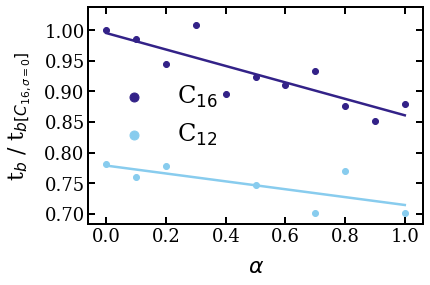

In [7]:
def func(x,b):
    return b

def func2(x,a,b):
    return a*x + b

charge=["0","10","20","30","40","50","60","70","80","90","100"]
charge_list=[]
for c in charge:
    charge_list.append(int(c))
    
alpha=[c/100 for c in charge_list]
    
apl_fit_list = []  
for df in dfs_apl_16:
    popt,pcov=curve_fit(func,df[df.columns[0]],df[df.columns[1]])
    apl_fit_list.append(popt[0])
    
S_fit_list = []  
for df in dfs_S_16:
    popt,pcov=curve_fit(func,df[df.columns[0]][1:12],df[df.columns[3]][1:12])
    S_fit_list.append(popt[0])

theta = [np.arccos((2*s+1)/3) for s in S_fit_list]
theta_deg = [(180/np.pi)*th for th in theta]

df = pd.DataFrame(list(zip(alpha,apl_fit_list,heights_16,S_fit_list,theta,theta_deg)),columns=["charge","APL","D","S","theta","theta(deg)"])
trend_params=[]
for y in [apl_fit_list,S_fit_list,theta_deg,heights_16]:
    popt2,pcov2=curve_fit(func2,alpha,y)
    trend_params.append(popt2)
plt.scatter(alpha,heights_16/heights_16[0],label="C$_{16}$")
plt.plot(alpha, func2(np.asarray(alpha), trend_params[3][0],trend_params[3][1])/heights_16[0])
plt.xlabel('$\\alpha$')
plt.ylabel('APL ($\AA^2$/lipid)')
plt.ylabel('Bilayer Thickness (nm)')
print(theta)
    
    

# charge=["0","10","20","50","70","80","100"]
# charge_list=[]
# for c in charge:
#     charge_list.append(int(c))
    
# apl_fit_list = []  
# for df in dfs_apl_14:
#     popt,pcov=curve_fit(func,df[df.columns[0]],df[df.columns[1]])
#     apl_fit_list.append(popt[0])
    
# S_fit_list = []  
# for df in dfs_S_14:
#     popt,pcov=curve_fit(func,df[df.columns[0]][1:10],df[df.columns[3]][1:10])
#     S_fit_list.append(popt[0])

# theta = [np.arccos((2*s+1)/3) for s in S_fit_list]
# theta_deg = [(180/np.pi)*th for th in theta]

# df = pd.DataFrame(list(zip(charge_list,apl_fit_list,heights_14,S_fit_list,theta,theta_deg)),columns=["charge","APL","D","S","theta","theta(deg)"])
# trend_params=[]
# for y in [apl_fit_list,S_fit_list,theta_deg,heights_14]:
#     popt2,pcov2=curve_fit(func2,charge_list,y)
#     trend_params.append(popt2)
# plt.scatter(charge_list,heights_14/heights_16[0])
# plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[3][0],trend_params[3][1])/heights_16[0],label="C$_{14}$")
# plt.xlabel('Charge Percent')
# plt.ylabel('APL ($\AA^2$/lipid)')
# plt.ylabel('Bilayer Thickness (nm)')
    

charge=["0","10","20","50","70","80","100"]
charge_list=[]
for c in charge:
    charge_list.append(int(c))
    
alpha=[c/100 for c in charge_list]
    
apl_fit_list = []  
for df in dfs_apl_12:
    popt,pcov=curve_fit(func,df[df.columns[0]],df[df.columns[1]])
    apl_fit_list.append(popt[0])
    
S_fit_list = []  
for df in dfs_S_12:
    popt,pcov=curve_fit(func,df[df.columns[0]][1:10],df[df.columns[3]][1:10])
    S_fit_list.append(popt[0])

theta = [np.arccos((2*s+1)/3) for s in S_fit_list]
theta_deg = [(180/np.pi)*th for th in theta]



df = pd.DataFrame(list(zip(alpha,apl_fit_list,heights_12,S_fit_list,theta,theta_deg)),columns=["charge","APL","D","S","theta","theta(deg)"])
trend_params=[]
for y in [apl_fit_list,S_fit_list,theta_deg,heights_12]:
    popt2,pcov2=curve_fit(func2,alpha,y)
    trend_params.append(popt2)
plt.scatter(alpha,heights_12/heights_16[0],label="C$_{12}$")
plt.plot(alpha, func2(np.asarray(alpha), trend_params[3][0],trend_params[3][1])/heights_16[0])
plt.xlabel('$\\alpha$',fontsize=22)
plt.ylabel('t$_b$ / t$_{b [C_{16,\sigma=0}]}$',fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=24,markerscale=1.5)



print(heights_12)
print(heights_16)




[0.8396710000000001, 0.792939666666215, 0.7915294444439896, 0.7443156666661088, 0.7115085555549263, 0.6672845555548297, 0.6170406666658312]


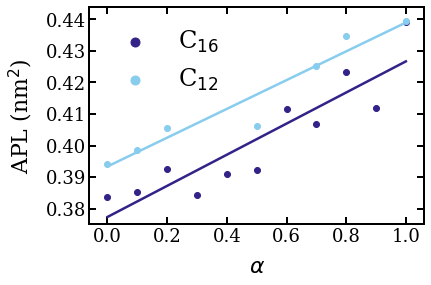

In [4]:
charge=["0","10","20","30","40","50","60","70","80","90","100"]
charge_list=[]
for c in charge:
    charge_list.append(int(c))
    
alpha=[c/100 for c in charge_list]
    
apl_fit_list = []  
for df in dfs_apl_16:
    popt,pcov=curve_fit(func,df[df.columns[0]],df[df.columns[1]])
    apl_fit_list.append(popt[0])

apl_fit_list=[a/100 for a in apl_fit_list]

S_fit_list = []  
for df in dfs_S_16:
    popt,pcov=curve_fit(func,df[df.columns[0]][1:12],df[df.columns[3]][1:12])
    S_fit_list.append(popt[0])

theta = [np.arccos((2*s+1)/3) for s in S_fit_list]
theta_deg = [(180/np.pi)*th for th in theta]

df = pd.DataFrame(list(zip(alpha,apl_fit_list,heights_16,S_fit_list,theta,theta_deg)),columns=["charge","APL","D","S","theta","theta(deg)"])
trend_params=[]
for y in [apl_fit_list,S_fit_list,theta_deg,heights_16]:
    popt2,pcov2=curve_fit(func2,alpha,y)
    trend_params.append(popt2)
plt.scatter(alpha,apl_fit_list,label="C$_{16}$")
plt.plot(alpha, func2(np.asarray(alpha), trend_params[0][0],trend_params[0][1]))
plt.xlabel('$\\alpha$')
plt.ylabel('APL ($\AA^2$/lipid)')    
    
    

# charge=["0","10","20","50","70","80","100"]
# charge_list=[]
# for c in charge:
#     charge_list.append(int(c))
    
# apl_fit_list = []  
# for df in dfs_apl_14:
#     popt,pcov=curve_fit(func,df[df.columns[0]],df[df.columns[1]])
#     apl_fit_list.append(popt[0])
    
# S_fit_list = []  
# for df in dfs_S_14:
#     popt,pcov=curve_fit(func,df[df.columns[0]][1:10],df[df.columns[3]][1:10])
#     S_fit_list.append(popt[0])

# theta = [np.arccos((2*s+1)/3) for s in S_fit_list]
# theta_deg = [(180/np.pi)*th for th in theta]

# df = pd.DataFrame(list(zip(charge_list,apl_fit_list,heights_14,S_fit_list,theta,theta_deg)),columns=["charge","APL","D","S","theta","theta(deg)"])
# trend_params=[]
# for y in [apl_fit_list,S_fit_list,theta_deg,heights_14]:
#     popt2,pcov2=curve_fit(func2,charge_list,y)
#     trend_params.append(popt2)
# plt.scatter(charge_list,apl_fit_list)
# plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[0][0],trend_params[0][1]),label="C$_{14}$")
# plt.xlabel('Charge Percent')
# plt.ylabel('APL ($\AA^2$/lipid)')
    
    

charge=["0","10","20","50","70","80","100"]
charge_list=[]
for c in charge:
    charge_list.append(int(c))
    
alpha=[c/100 for c in charge_list]
    
apl_fit_list = []  
for df in dfs_apl_12:
    popt,pcov=curve_fit(func,df[df.columns[0]],df[df.columns[1]])
    apl_fit_list.append(popt[0])
    
apl_fit_list=[a/100 for a in apl_fit_list]
    
S_fit_list = []  
for df in dfs_S_12:
    popt,pcov=curve_fit(func,df[df.columns[0]][1:10],df[df.columns[3]][1:10])
    S_fit_list.append(popt[0])

theta = [np.arccos((2*s+1)/3) for s in S_fit_list]
theta_deg = [(180/np.pi)*th for th in theta]

df = pd.DataFrame(list(zip(alpha,apl_fit_list,heights_12,S_fit_list,theta,theta_deg)),columns=["charge","APL","D","S","theta","theta(deg)"])
trend_params=[]
for y in [apl_fit_list,S_fit_list,theta_deg,heights_12]:
    popt2,pcov2=curve_fit(func2,alpha,y)
    trend_params.append(popt2)
plt.scatter(alpha,apl_fit_list,label="C$_{12}$")
plt.plot(alpha, func2(np.asarray(alpha), trend_params[0][0],trend_params[0][1]))
plt.xlabel('$\\alpha$',fontsize=22)
plt.ylabel('APL (nm$^2$)',fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(0.375,0.444)
plt.legend(fontsize=24,markerscale=1.5)
print(S_fit_list)

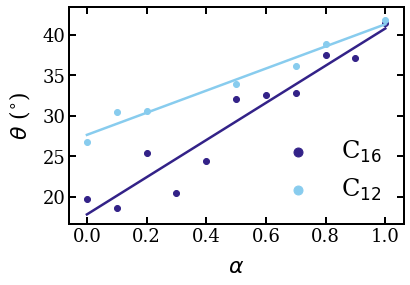

In [31]:
charge=["0","10","20","30","40","50","60","70","80","90","100"]
charge_list=[]
for c in charge:
    charge_list.append(int(c))

alpha=[c/100 for c in charge_list]

apl_fit_list = []  
for df in dfs_apl_16:
    popt,pcov=curve_fit(func,df[df.columns[0]],df[df.columns[1]])
    apl_fit_list.append(popt[0])
    
S_fit_list = []  
for df in dfs_S_16:
    popt,pcov=curve_fit(func,df[df.columns[0]][1:12],df[df.columns[3]][1:12])
    S_fit_list.append(popt[0])

theta = [np.arccos((2*s+1)/3) for s in S_fit_list]
theta_deg = [(180/np.pi)*th for th in theta]

df = pd.DataFrame(list(zip(alpha,apl_fit_list,heights_16,S_fit_list,theta,theta_deg)),columns=["charge","APL","D","S","theta","theta(deg)"])
trend_params=[]
for y in [apl_fit_list,S_fit_list,theta_deg,heights_16]:
    popt2,pcov2=curve_fit(func2,alpha,y)
    trend_params.append(popt2)
plt.scatter(alpha,theta_deg,label="C$_{16}$")
plt.plot(alpha, func2(np.asarray(alpha), trend_params[2][0],trend_params[2][1]))
plt.xlabel('$\\alpha$')
plt.ylabel('Average Tilt Angle (deg)')   
    
    

# charge=["0","10","20","50","70","80","100"]
# charge_list=[]
# for c in charge:
#     charge_list.append(int(c))
    
# apl_fit_list = []  
# for df in dfs_apl_14:
#     popt,pcov=curve_fit(func,df[df.columns[0]],df[df.columns[1]])
#     apl_fit_list.append(popt[0])
    
# S_fit_list = []  
# for df in dfs_S_14:
#     popt,pcov=curve_fit(func,df[df.columns[0]][1:10],df[df.columns[3]][1:10])
#     S_fit_list.append(popt[0])

# theta = [np.arccos((2*s+1)/3) for s in S_fit_list]
# theta_deg = [(180/np.pi)*th for th in theta]

# df = pd.DataFrame(list(zip(charge_list,apl_fit_list,heights_14,S_fit_list,theta,theta_deg)),columns=["charge","APL","D","S","theta","theta(deg)"])
# trend_params=[]
# for y in [apl_fit_list,S_fit_list,theta_deg,heights_14]:
#     popt2,pcov2=curve_fit(func2,charge_list,y)
#     trend_params.append(popt2)
# plt.scatter(charge_list,theta_deg)
# plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[2][0],trend_params[2][1]),label="C$_{14}$")
# plt.xlabel('Charge Percent')
# plt.ylabel('Average Tilt Angle (deg)')
    
    

charge=["0","10","20","50","70","80","100"]
charge_list=[]
for c in charge:
    charge_list.append(int(c))

alpha=[c/100 for c in charge_list]

apl_fit_list = []  
for df in dfs_apl_12:
    popt,pcov=curve_fit(func,df[df.columns[0]],df[df.columns[1]])
    apl_fit_list.append(popt[0])
    
S_fit_list = []  
for df in dfs_S_12:
    popt,pcov=curve_fit(func,df[df.columns[0]][1:10],df[df.columns[3]][1:10])
    S_fit_list.append(popt[0])

theta = [np.arccos((2*s+1)/3) for s in S_fit_list]
theta_deg = [(180/np.pi)*th for th in theta]

df = pd.DataFrame(list(zip(alpha,apl_fit_list,heights_12,S_fit_list,theta,theta_deg)),columns=["charge","APL","D","S","theta","theta(deg)"])
trend_params=[]
for y in [apl_fit_list,S_fit_list,theta_deg,heights_12]:
    popt2,pcov2=curve_fit(func2,alpha,y)
    trend_params.append(popt2)
plt.scatter(alpha,theta_deg,label="C$_{12}$")
plt.plot(alpha, func2(np.asarray(alpha), trend_params[2][0],trend_params[2][1]))
plt.xlabel('$\\alpha$',fontsize=22)
plt.ylabel('$\\theta$ ($^{\circ}$)',fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=24,markerscale=1.5)

In [ ]:
charge=["0","10","20","30","40","50","60","70","80","90","100"]
charge_list=[]
for c in charge:
    charge_list.append(int(c))
    
apl_fit_list = []  
for df in dfs_apl_16:
    popt,pcov=curve_fit(func,df[df.columns[0]],df[df.columns[1]])
    apl_fit_list.append(popt[0])
    
S_fit_list = []  
for df in dfs_S_16:
    popt,pcov=curve_fit(func,df[df.columns[0]][1:12],df[df.columns[3]][1:12])
    S_fit_list.append(popt[0])

theta = [np.arccos((2*s+1)/3) for s in S_fit_list]
theta_deg = [(180/np.pi)*th for th in theta]

df = pd.DataFrame(list(zip(charge_list,apl_fit_list,heights_16,S_fit_list,theta,theta_deg)),columns=["charge","APL","D","S","theta","theta(deg)"])
trend_params=[]
for y in [apl_fit_list,S_fit_list,theta_deg,heights_16]:
    popt2,pcov2=curve_fit(func2,charge_list,y)
    trend_params.append(popt2)


plt.figure()
plt.scatter(charge_list,apl_fit_list)
plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[0][0],trend_params[0][1]))
plt.xlabel('Charge Percent')
plt.ylabel('APL ($\AA^2$/lipid)')
plt.figure()
plt.scatter(charge_list,S_fit_list)
plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[1][0],trend_params[1][1]))
plt.xlabel('Charge Percent')
plt.ylabel('S (average)')
plt.figure()
plt.scatter(charge_list,theta_deg)
plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[2][0],trend_params[2][1]))
plt.xlabel('Charge Percent')
plt.ylabel('Average Tilt Angle (deg)')
plt.figure()
plt.scatter(charge_list,heights_16)
plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[3][0],trend_params[3][1]))
plt.xlabel('Charge Percent')
plt.ylabel('Bilayer Thickness (nm)')

In [ ]:
charge=["0","10","20","50","70","80","100"]
charge_list=[]
for c in charge:
    charge_list.append(int(c))
    
apl_fit_list = []  
for df in dfs_apl_12:
    popt,pcov=curve_fit(func,df[df.columns[0]],df[df.columns[1]])
    apl_fit_list.append(popt[0])
    
S_fit_list = []  
for df in dfs_S_12:
    popt,pcov=curve_fit(func,df[df.columns[0]][1:12],df[df.columns[3]][1:12])
    S_fit_list.append(popt[0])

theta = [np.arccos((2*s+1)/3) for s in S_fit_list]
theta_deg = [(180/np.pi)*th for th in theta]

df = pd.DataFrame(list(zip(charge_list,apl_fit_list,heights_12,S_fit_list,theta,theta_deg)),columns=["charge","APL","D","S","theta","theta(deg)"])
trend_params=[]
for y in [apl_fit_list,S_fit_list,theta_deg,heights_12]:
    popt2,pcov2=curve_fit(func2,charge_list,y)
    trend_params.append(popt2)


plt.figure()
plt.scatter(charge_list,apl_fit_list)
plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[0][0],trend_params[0][1]))
plt.xlabel('Charge Percent')
plt.ylabel('APL ($\AA^2$/lipid)')
plt.figure()
plt.scatter(charge_list,S_fit_list)
plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[1][0],trend_params[1][1]))
plt.xlabel('Charge Percent')
plt.ylabel('S (average)')
plt.figure()
plt.scatter(charge_list,theta_deg)
plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[2][0],trend_params[2][1]))
plt.xlabel('Charge Percent')
plt.ylabel('Average Tilt Angle (deg)')
plt.figure()
plt.scatter(charge_list,heights_12)
plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[3][0],trend_params[3][1]))
plt.xlabel('Charge Percent')
plt.ylabel('Bilayer Thickness (nm)')

Text(0, 0.5, 'Bilayer Thickness (nm)')

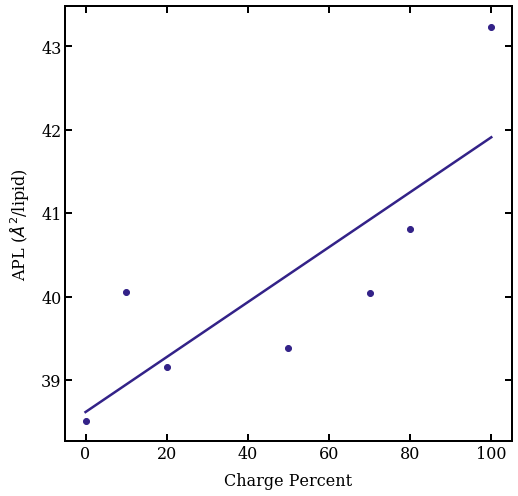

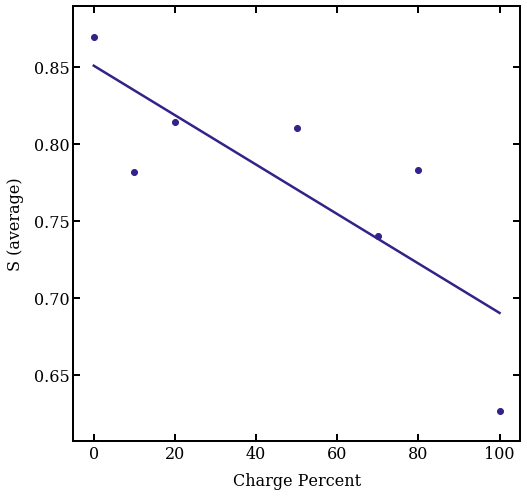

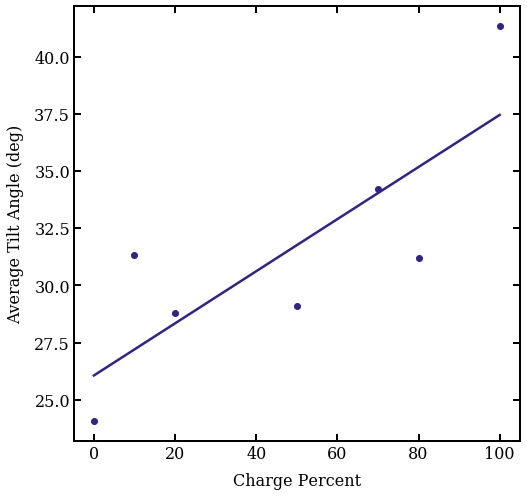

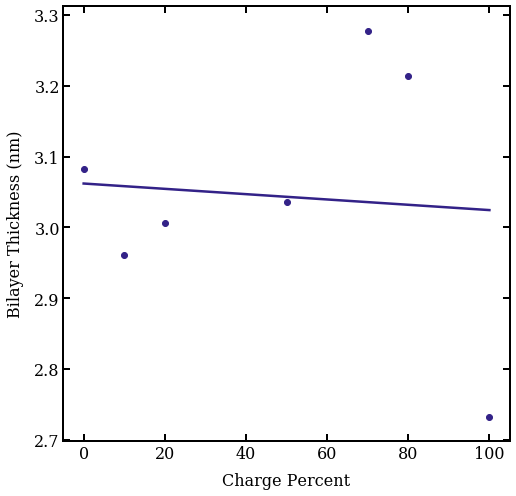

In [28]:
charge=["0","10","20","50","70","80","100"]
charge_list=[]
for c in charge:
    charge_list.append(int(c))
    
apl_fit_list = []  
for df in dfs_apl_14:
    popt,pcov=curve_fit(func,df[df.columns[0]],df[df.columns[1]])
    apl_fit_list.append(popt[0])
    
S_fit_list = []  
for df in dfs_S_14:
    popt,pcov=curve_fit(func,df[df.columns[0]][1:12],df[df.columns[3]][1:12])
    S_fit_list.append(popt[0])

theta = [np.arccos((2*s+1)/3) for s in S_fit_list]
theta_deg = [(180/np.pi)*th for th in theta]

df = pd.DataFrame(list(zip(charge_list,apl_fit_list,heights_14,S_fit_list,theta,theta_deg)),columns=["charge","APL","D","S","theta","theta(deg)"])
trend_params=[]
for y in [apl_fit_list,S_fit_list,theta_deg,heights_14]:
    popt2,pcov2=curve_fit(func2,charge_list,y)
    trend_params.append(popt2)


plt.figure()
plt.scatter(charge_list,apl_fit_list)
plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[0][0],trend_params[0][1]))
plt.xlabel('Charge Percent')
plt.ylabel('APL ($\AA^2$/lipid)')
plt.figure()
plt.scatter(charge_list,S_fit_list)
plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[1][0],trend_params[1][1]))
plt.xlabel('Charge Percent')
plt.ylabel('S (average)')
plt.figure()
plt.scatter(charge_list,theta_deg)
plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[2][0],trend_params[2][1]))
plt.xlabel('Charge Percent')
plt.ylabel('Average Tilt Angle (deg)')
plt.figure()
plt.scatter(charge_list,heights_14)
plt.plot(charge_list, func2(np.asarray(charge_list), trend_params[3][0],trend_params[3][1]))
plt.xlabel('Charge Percent')
plt.ylabel('Bilayer Thickness (nm)')